In [20]:
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
import os, glob
import libstempo as T2
from libstempo import toasim as LT
from libstempo import plot as LP
import enterprise
from enterprise.pulsar import Pulsar
from simFuncs import *

In [11]:
datadir = '/home/mattm/projects/HSYMT/partim_real/tdb/'
rand_select = np.random.randint(0, 82, size=10)

parfiles = sorted(glob.glob(datadir + '/*.par'))
timfiles = sorted(glob.glob(datadir + '/*.tim'))

parfiles = np.array(parfiles)[[rand_select]].tolist()[0]
timfiles = np.array(timfiles)[[rand_select]].tolist()[0]

In [12]:
# define observation times and duration
# Tobs = 4.0 # years
# deltaT = 26.0 # points per year
# obstimes = 53000.0 + np.arange(0.0, Tobs*365.25, 365.25/20.0)
# tref = obstimes[0]*86400.0

In [13]:
parfiles

['/home/mattm/projects/HSYMT/partim_real/tdb/J1825-0319_tdb.par',
 '/home/mattm/projects/HSYMT/partim_real/tdb/J1012-4235_tdb.par',
 '/home/mattm/projects/HSYMT/partim_real/tdb/J1036-8317_tdb.par',
 '/home/mattm/projects/HSYMT/partim_real/tdb/J0125-2327_tdb.par',
 '/home/mattm/projects/HSYMT/partim_real/tdb/J0030+0451_tdb.par',
 '/home/mattm/projects/HSYMT/partim_real/tdb/J2124-3358_tdb.par',
 '/home/mattm/projects/HSYMT/partim_real/tdb/J1543-5149_tdb.par',
 '/home/mattm/projects/HSYMT/partim_real/tdb/J1708-3506_tdb.par',
 '/home/mattm/projects/HSYMT/partim_real/tdb/J1825-0319_tdb.par',
 '/home/mattm/projects/HSYMT/partim_real/tdb/J1455-3330_tdb.par']

In [14]:
# create pulsar objects from parfiles
# default TOA errors are set to 0.4 microseconds
psrs = []
psrs = create_ideal_psrs(parfiles, timfiles=timfiles)

/home/mattm/projects/HSYMT/partim_real/tdb/J1825-0319_tdb.par[preProcess.C:158] Warning: PSR J2229+2643 uses DM2+ but does not define DM_SERIES. Assume Taylor. This has behaviour has changed since June 2020!
See https://bitbucket.org/psrsoft/tempo2/issues/27/tempo2-dm-polynomial-is-not-a-taylor

[preProcess.C:158] Warning: PSR J1125-6014 uses DM2+ but does not define DM_SERIES. Assume Taylor. This has behaviour has changed since June 2020!
See https://bitbucket.org/psrsoft/tempo2/issues/27/tempo2-dm-polynomial-is-not-a-taylor

[preProcess.C:158] Warning: PSR J0610-2100 uses DM2+ but does not define DM_SERIES. Assume Taylor. This has behaviour has changed since June 2020!
See https://bitbucket.org/psrsoft/tempo2/issues/27/tempo2-dm-polynomial-is-not-a-taylor

[preProcess.C:158] Warning: PSR J1435-6100 uses DM2+ but does not define DM_SERIES. Assume Taylor. This has behaviour has changed since June 2020!
See https://bitbucket.org/psrsoft/tempo2/issues/27/tempo2-dm-polynomial-is-not-a-tay

In [15]:
# Add achromatic red noise

psrs, red_noise = add_red(psrs,rand=True)
print("Red noise added")
print(red_noise)

Red noise added
{'J1825-0319': {'red_amp': 6.317726112371395e-14, 'red_gamma': 2.8096581715740503}, 'J1012-4235': {'red_amp': 3.57147266512837e-15, 'red_gamma': 5.355483078979584}, 'J1036-8317': {'red_amp': 9.334080617761262e-14, 'red_gamma': 5.728745018350169}, 'J0125-2327': {'red_amp': 3.137456758586169e-14, 'red_gamma': 2.823997799683145}, 'J0030+0451': {'red_amp': 7.83191342570627e-14, 'red_gamma': 6.658682260241365}, 'J2124-3358': {'red_amp': 2.106456845982536e-14, 'red_gamma': 5.746459555034618}, 'J1543-5149': {'red_amp': 6.445608610877041e-14, 'red_gamma': 6.303768326397559}, 'J1708-3506': {'red_amp': 8.939463322197574e-15, 'red_gamma': 2.083883596515993}, 'J1455-3330': {'red_amp': 3.651461369299515e-14, 'red_gamma': 3.3785485394255534}}


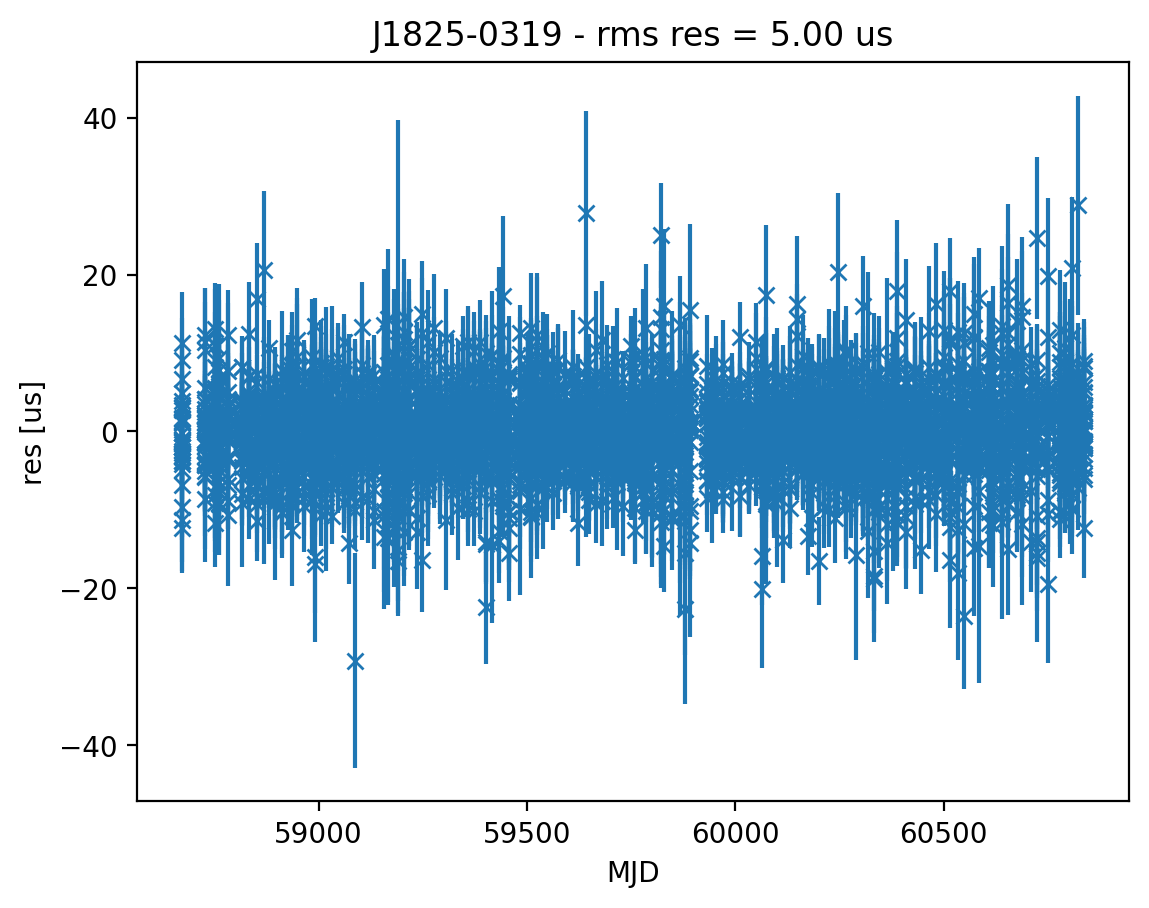

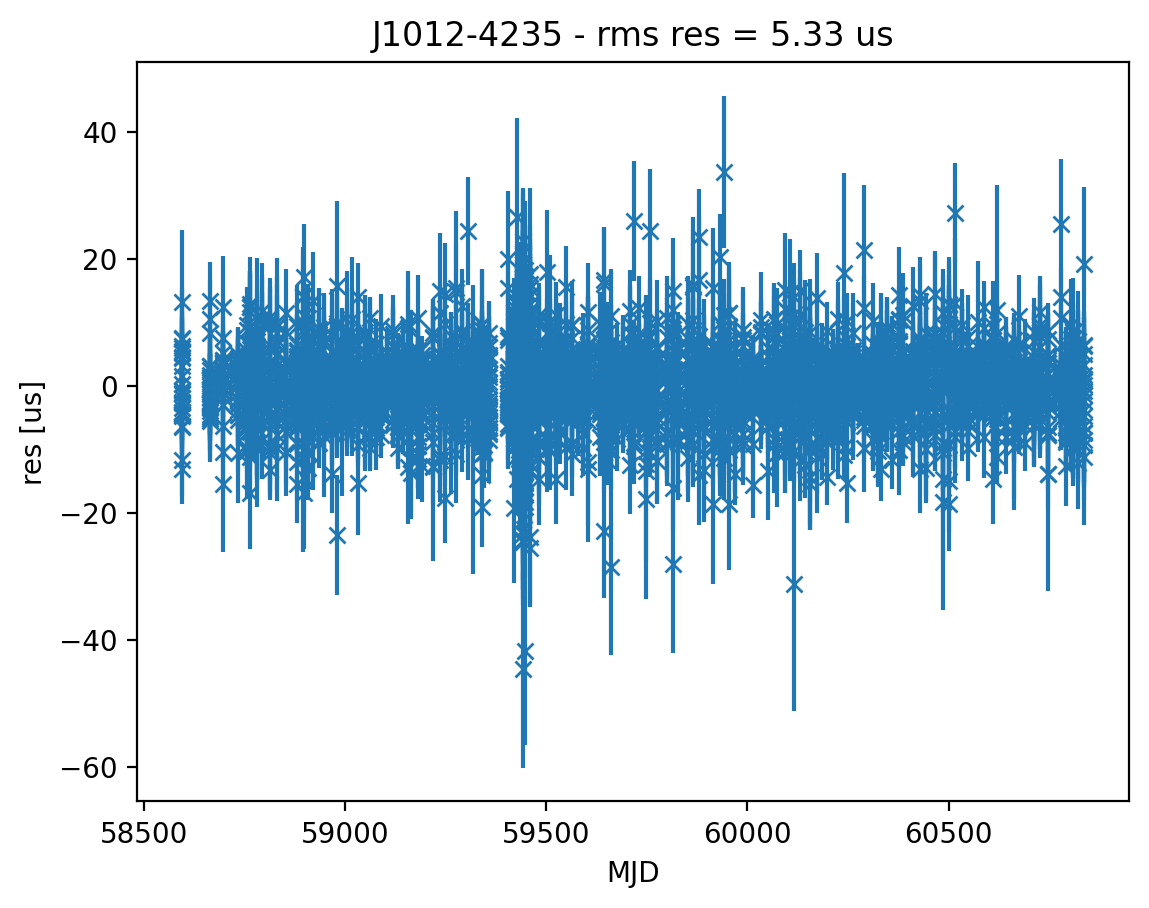

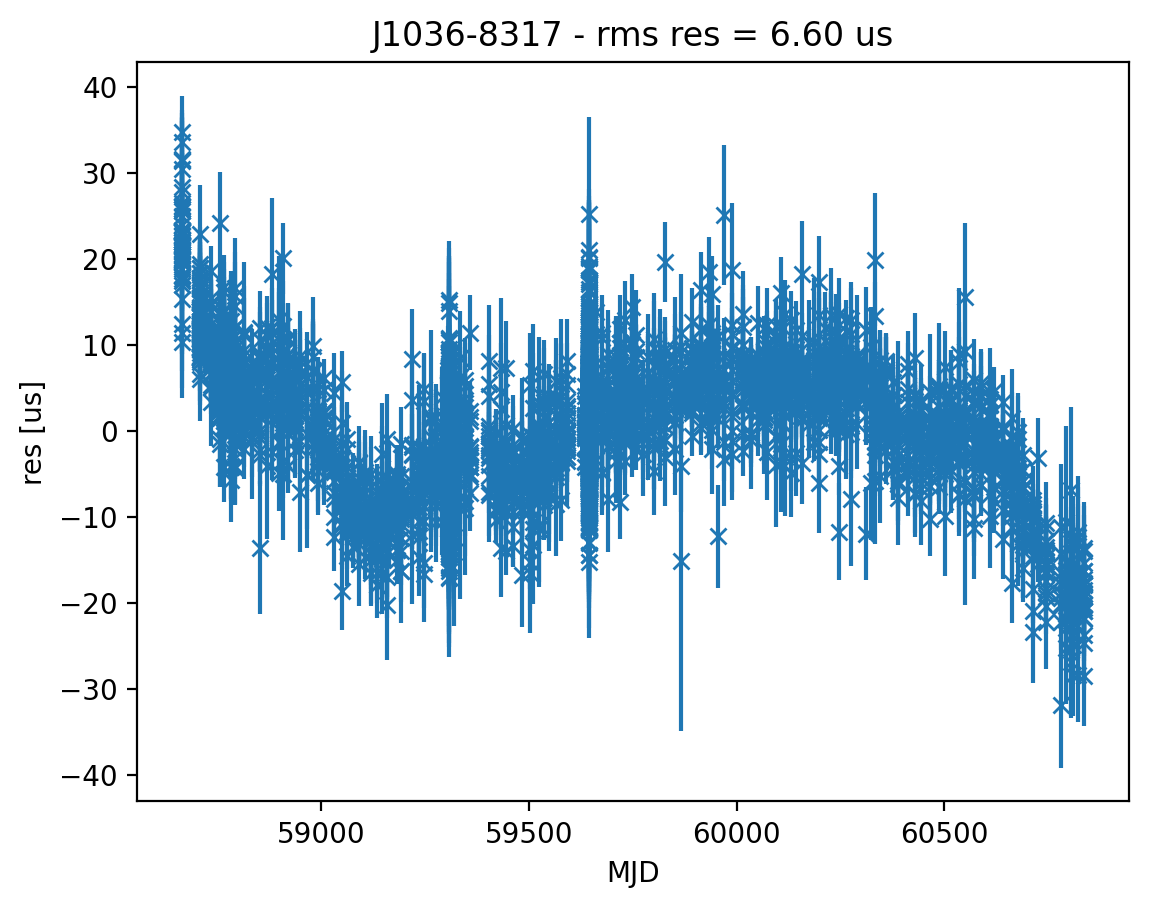

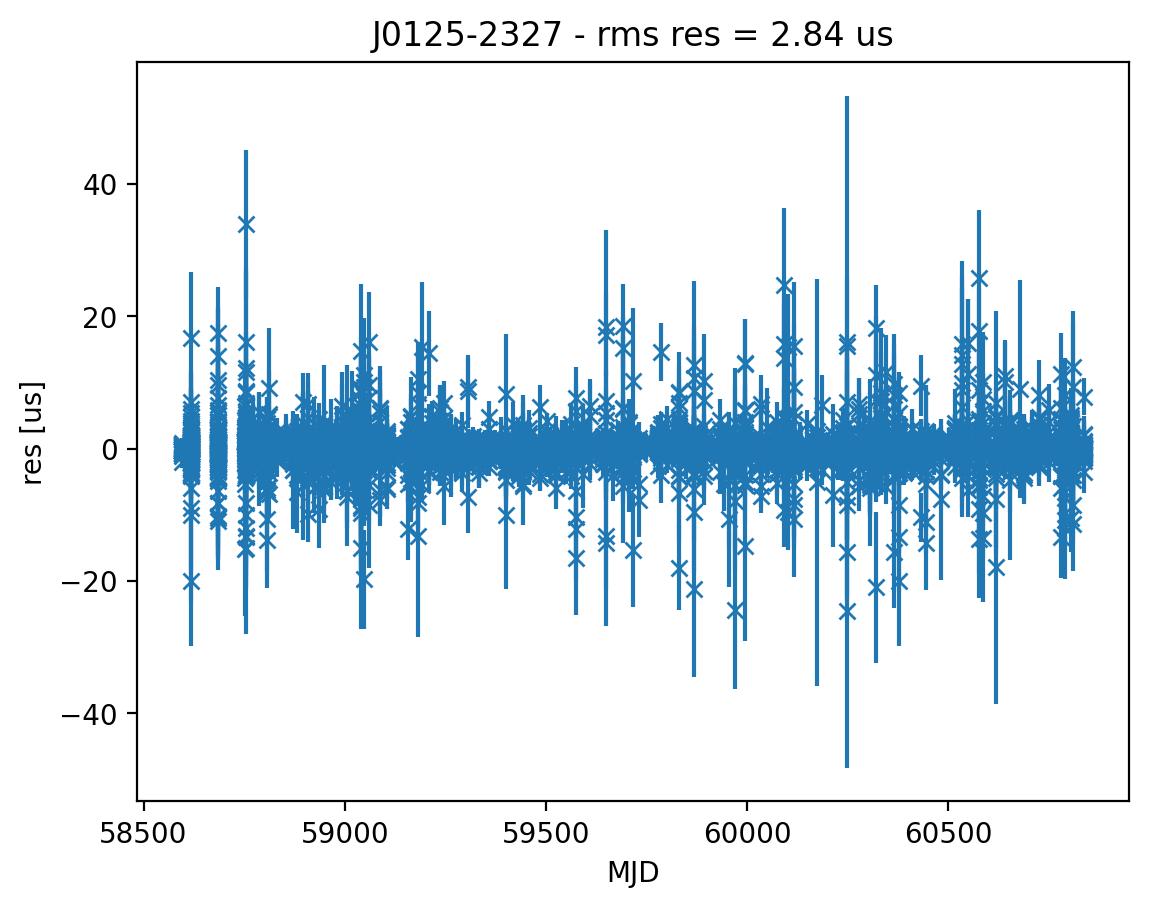

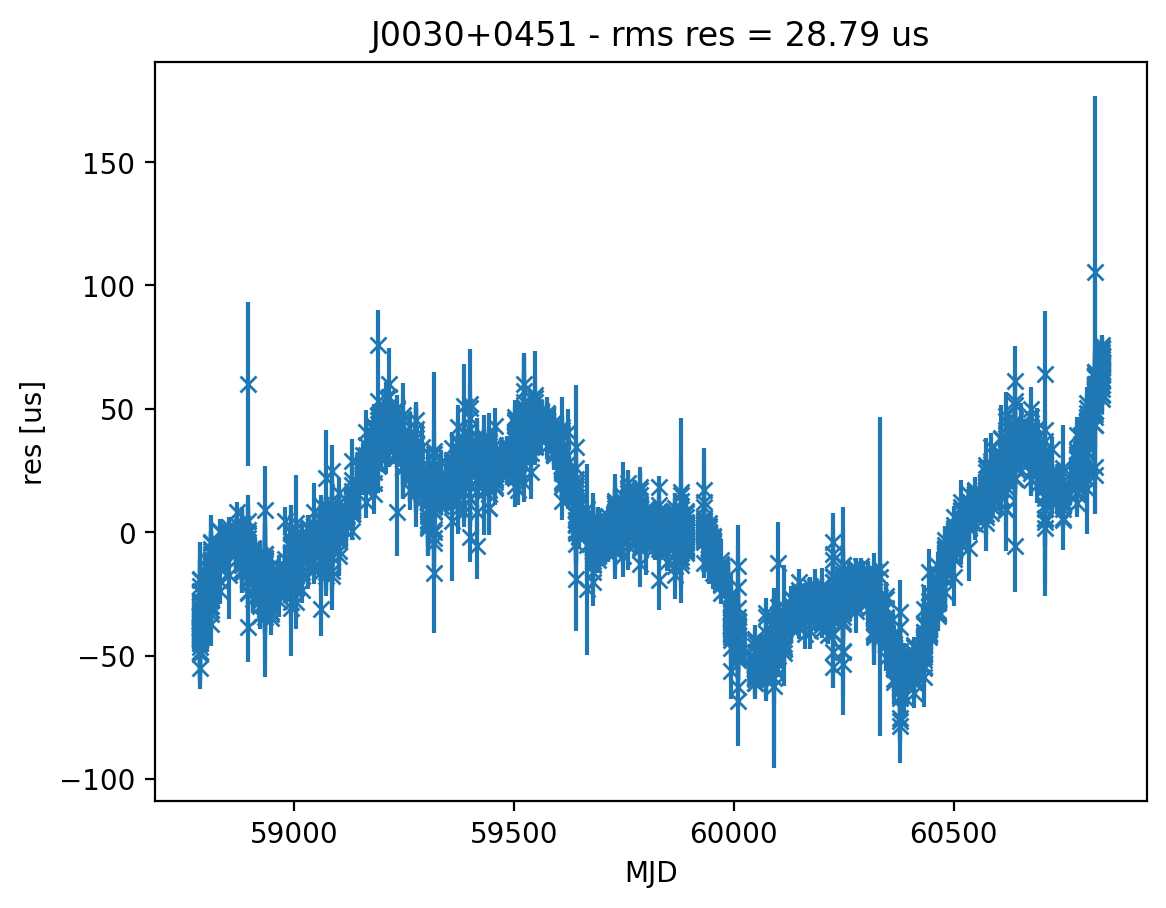

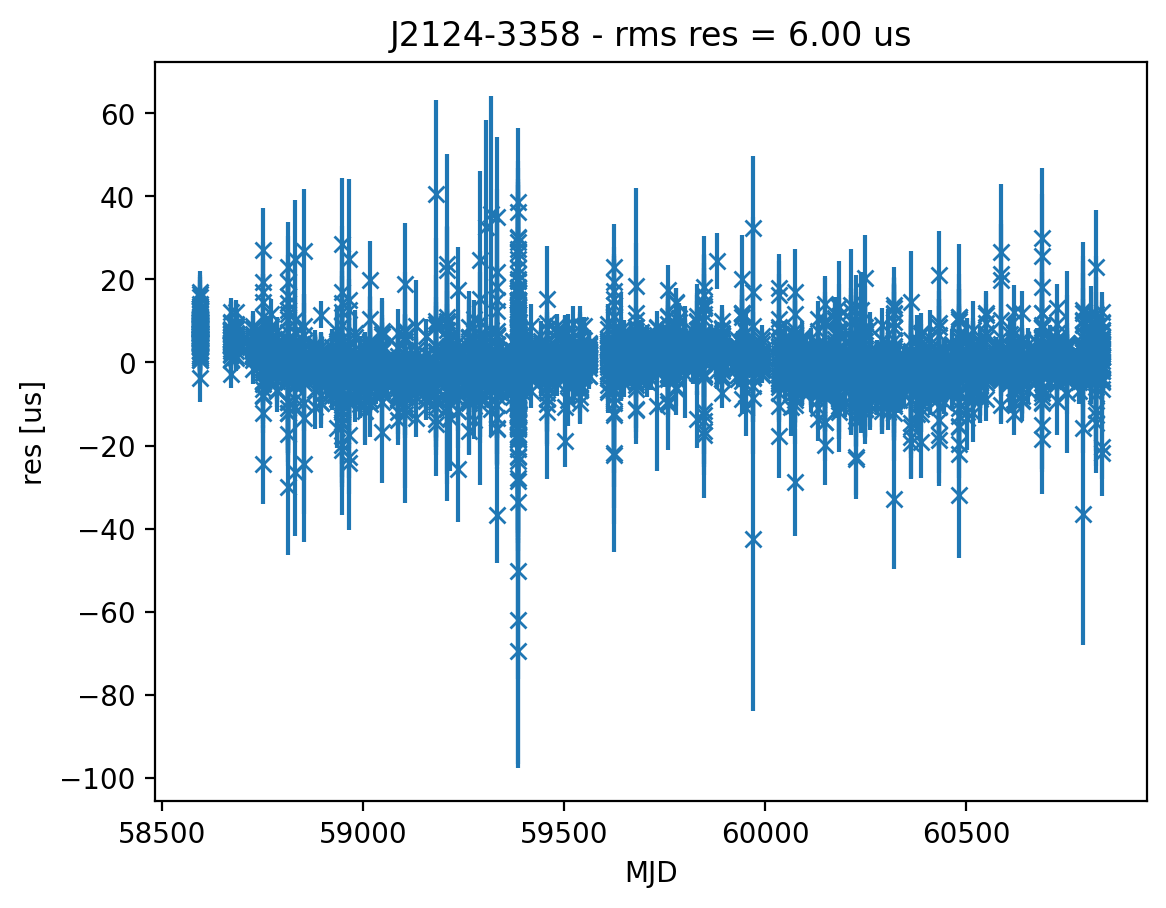

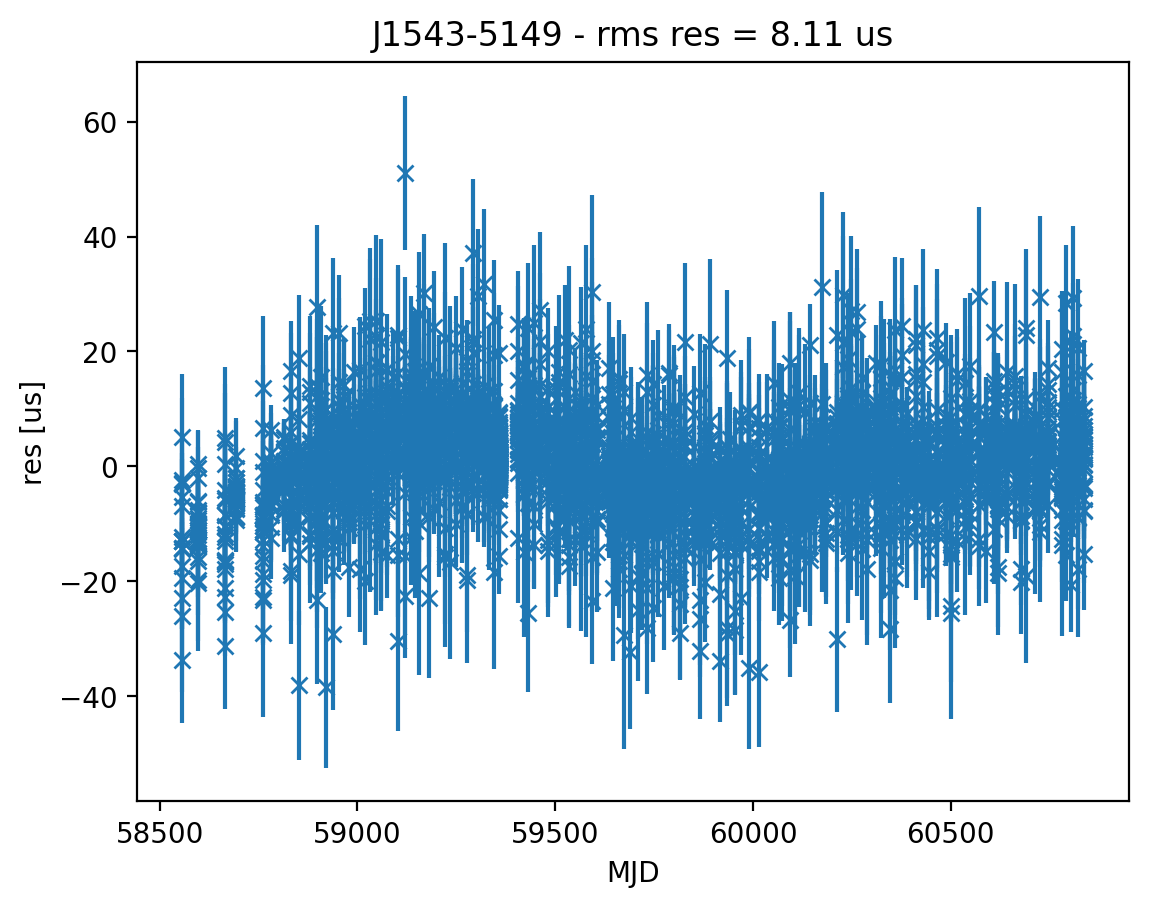

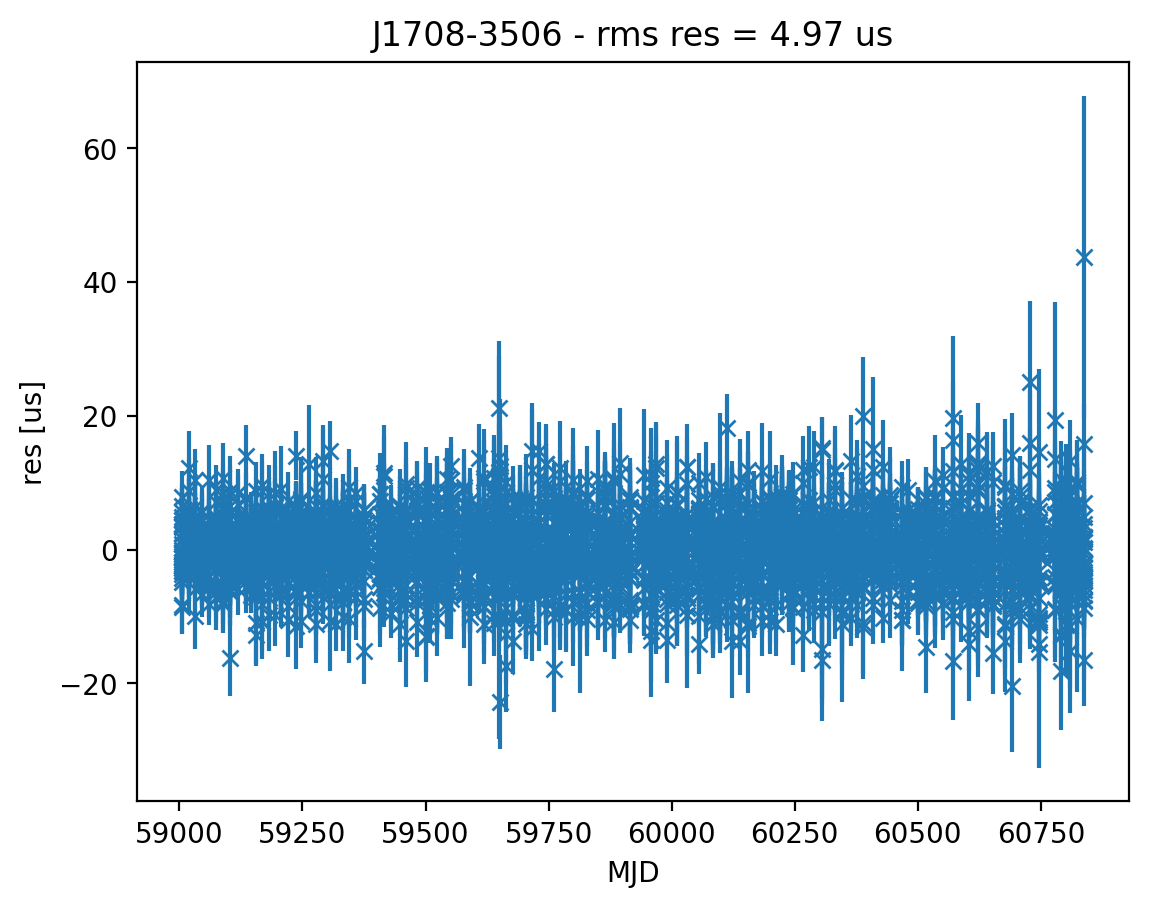

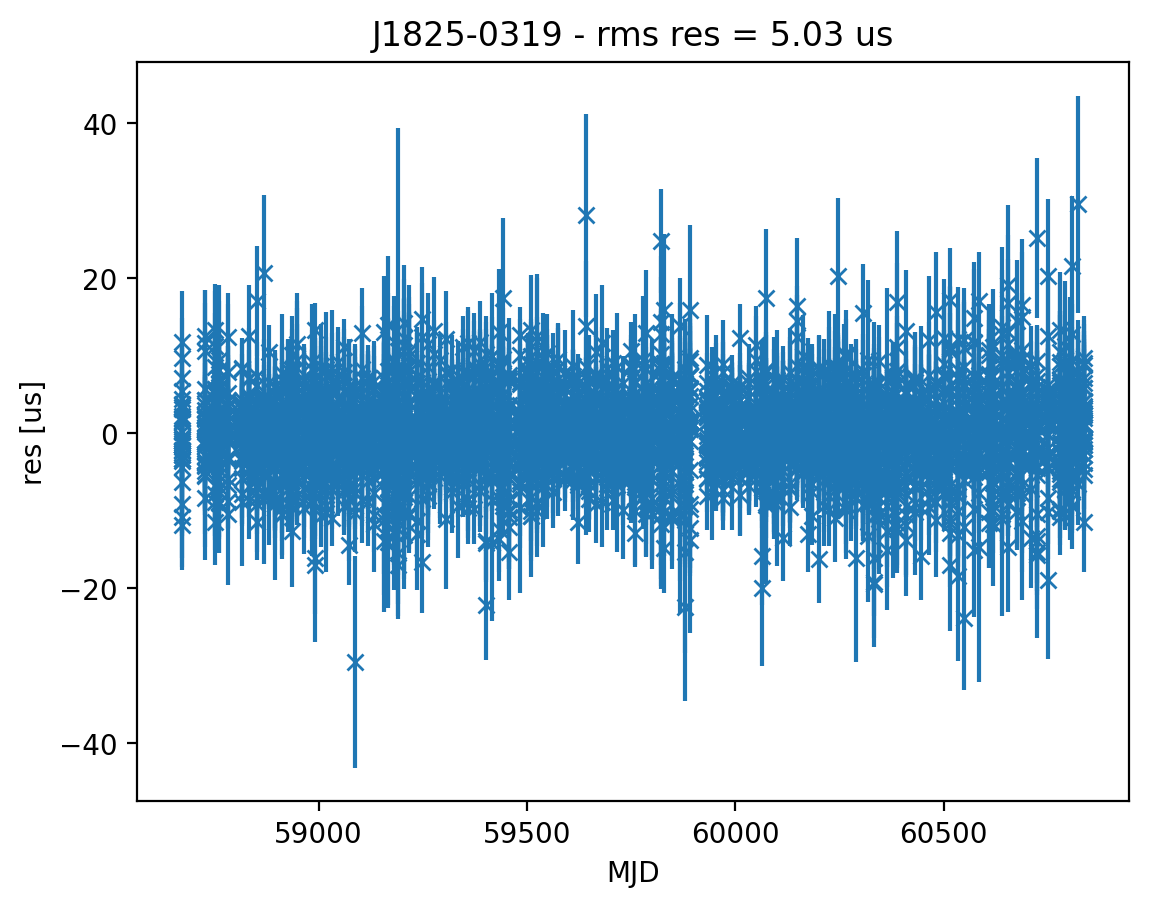

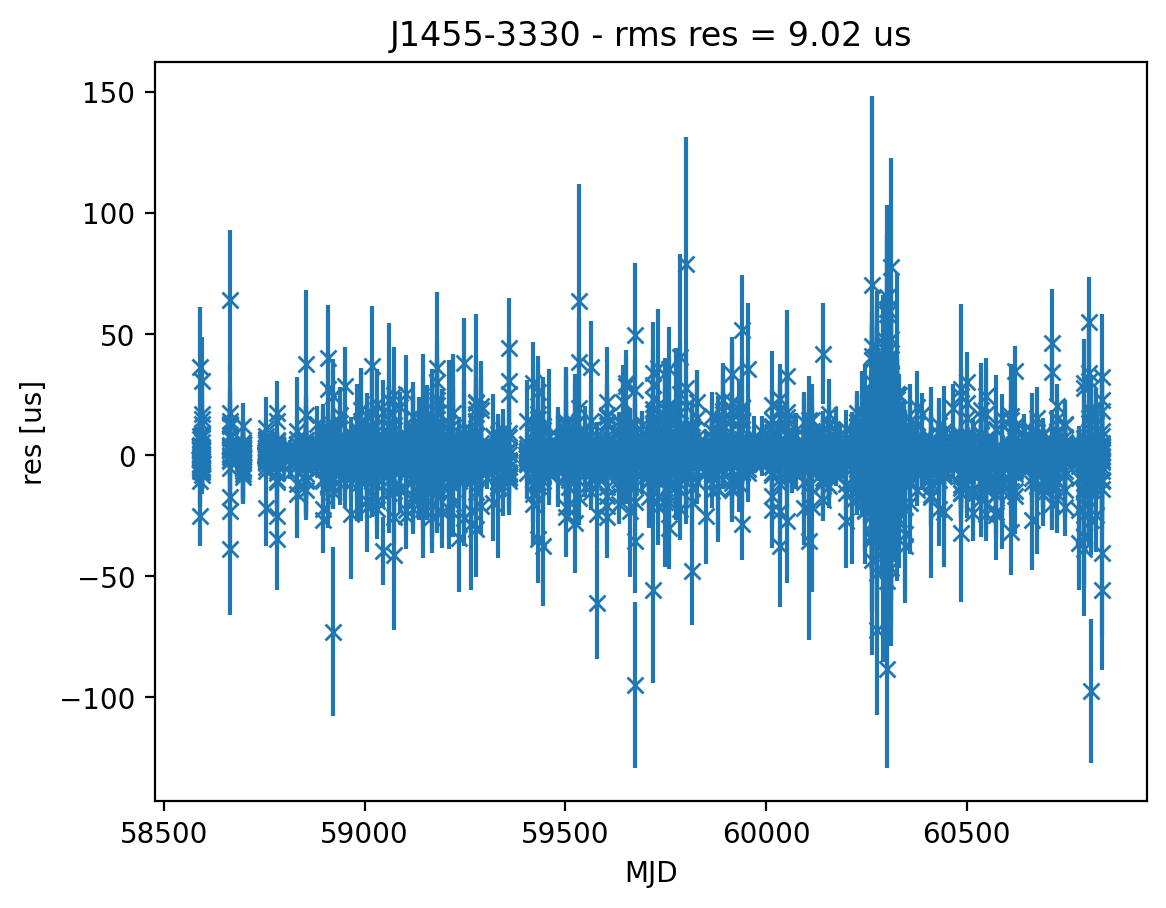

In [16]:
#plot residuals to check RN injection

for i in range(len(psrs)):
    plt.figure(i)
    LP.plotres(psrs[i])

In [17]:
# Add DM noise

psrs, dm_noise = add_dm(psrs,rand=True)
print("DM noise added")
print(dm_noise)

DM noise added
{'J1825-0319': {'dm_amp': 1.2526466593680142e-14, 'dm_gamma': 4.8263303584175965}, 'J1012-4235': {'dm_amp': 8.517092738831833e-14, 'dm_gamma': 5.495564179291418}, 'J1036-8317': {'dm_amp': 2.9326267685968763e-15, 'dm_gamma': 5.901380193709024}, 'J0125-2327': {'dm_amp': 5.364154765171445e-14, 'dm_gamma': 1.0463860647966936}, 'J0030+0451': {'dm_amp': 9.16319178711918e-14, 'dm_gamma': 5.573799806558037}, 'J2124-3358': {'dm_amp': 4.5515333283303016e-14, 'dm_gamma': 2.6811665981149586}, 'J1543-5149': {'dm_amp': 2.3666230242030754e-14, 'dm_gamma': 5.141489779894833}, 'J1708-3506': {'dm_amp': 6.838015341986749e-14, 'dm_gamma': 5.32911397415873}, 'J1455-3330': {'dm_amp': 1.820378936154125e-14, 'dm_gamma': 4.02638710883417}}


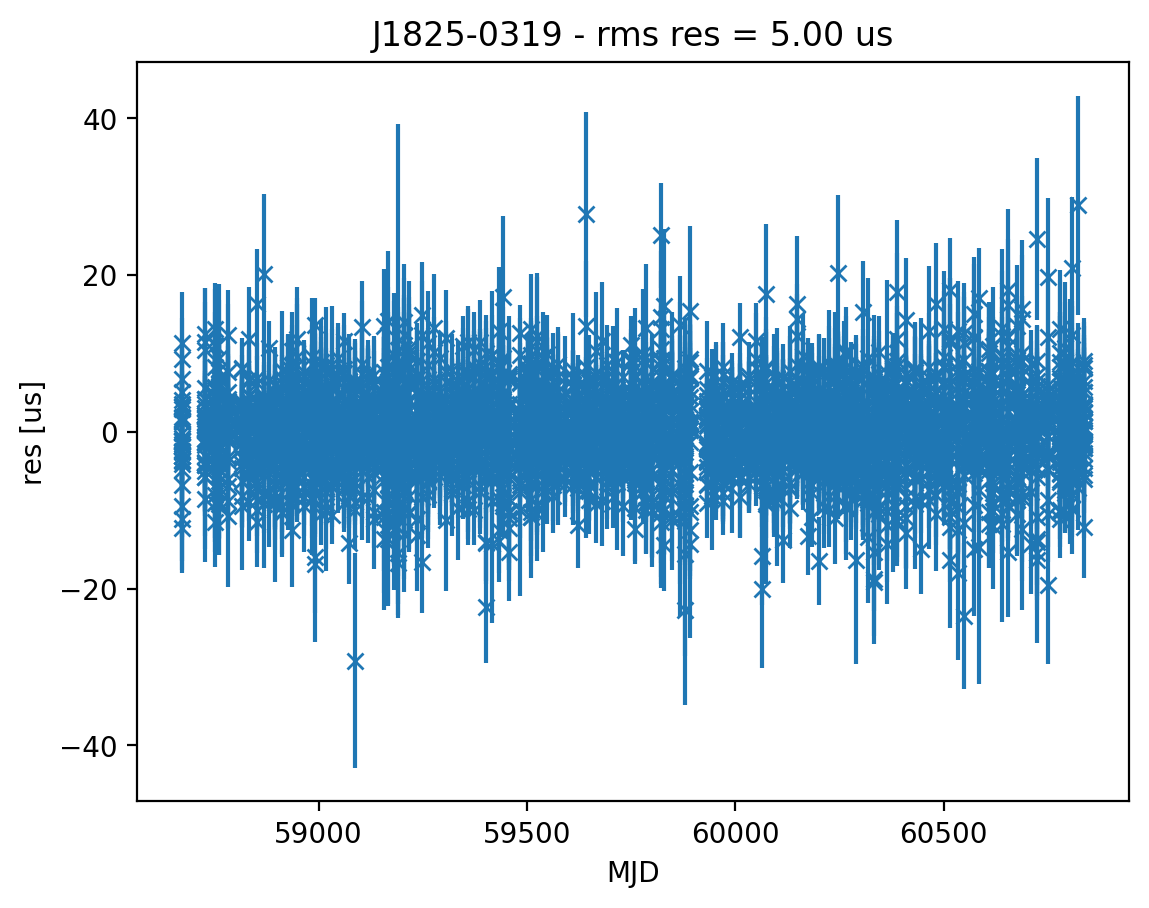

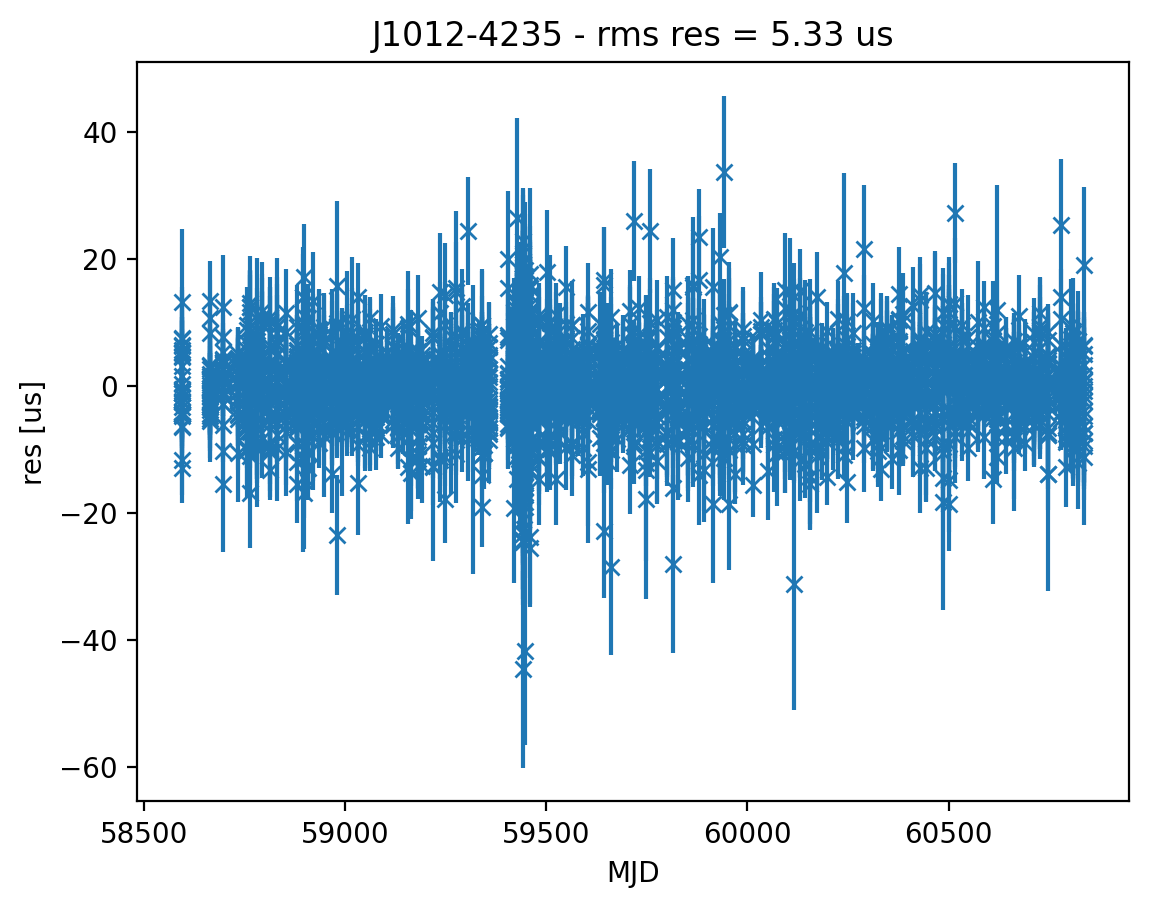

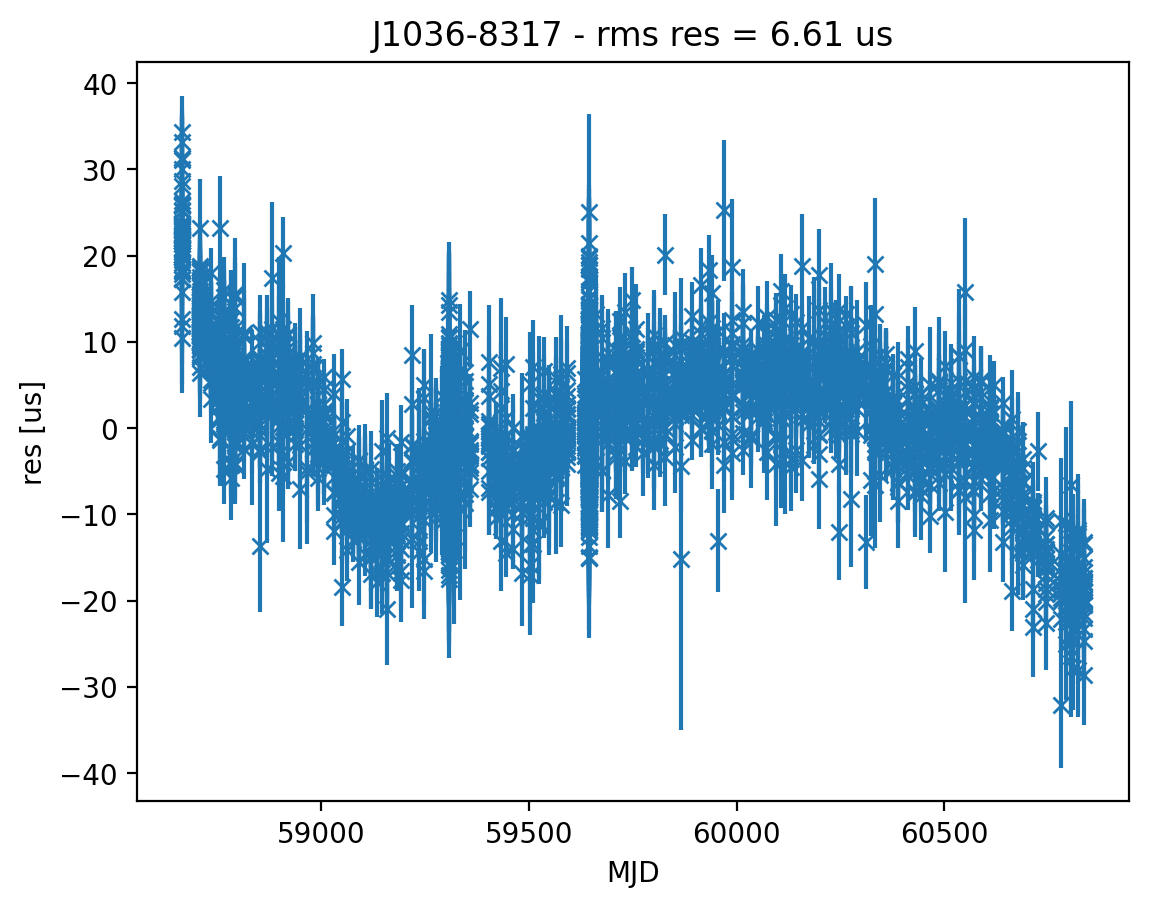

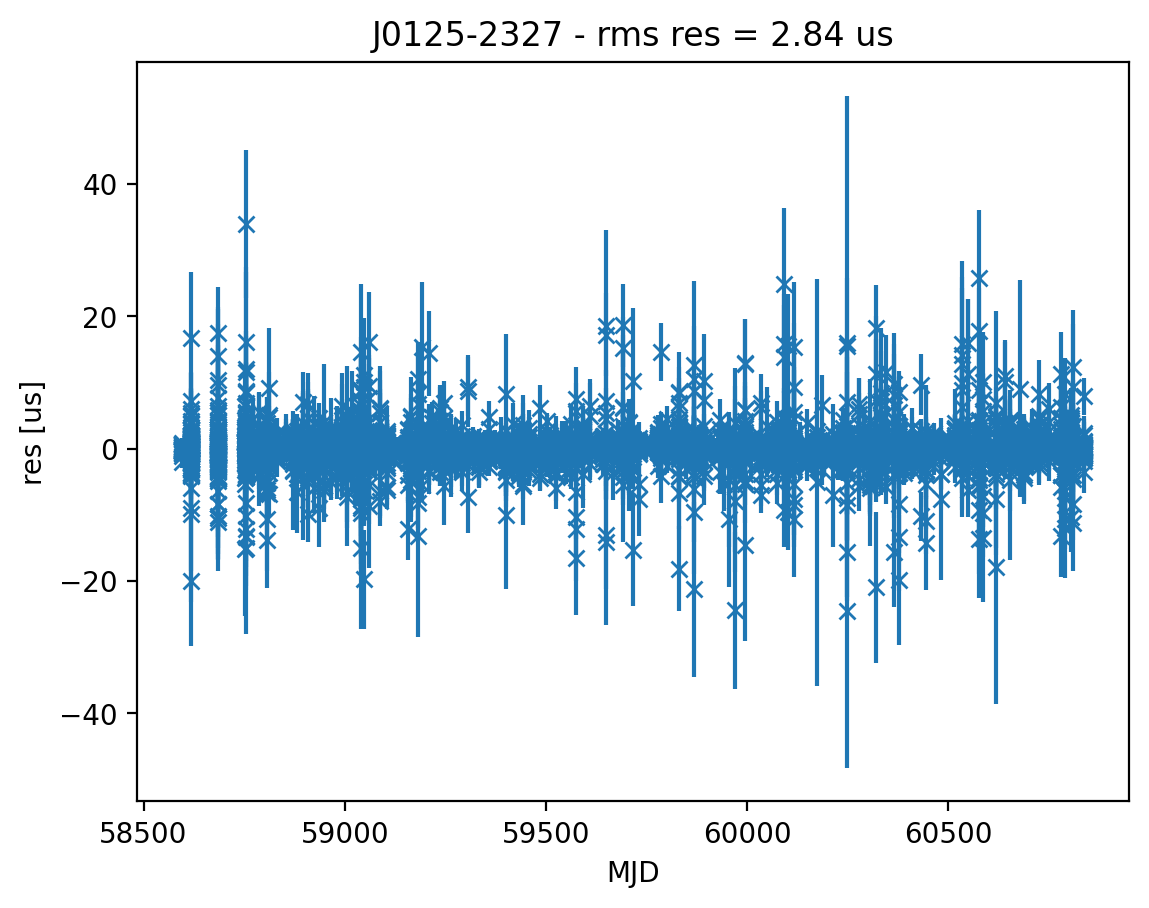

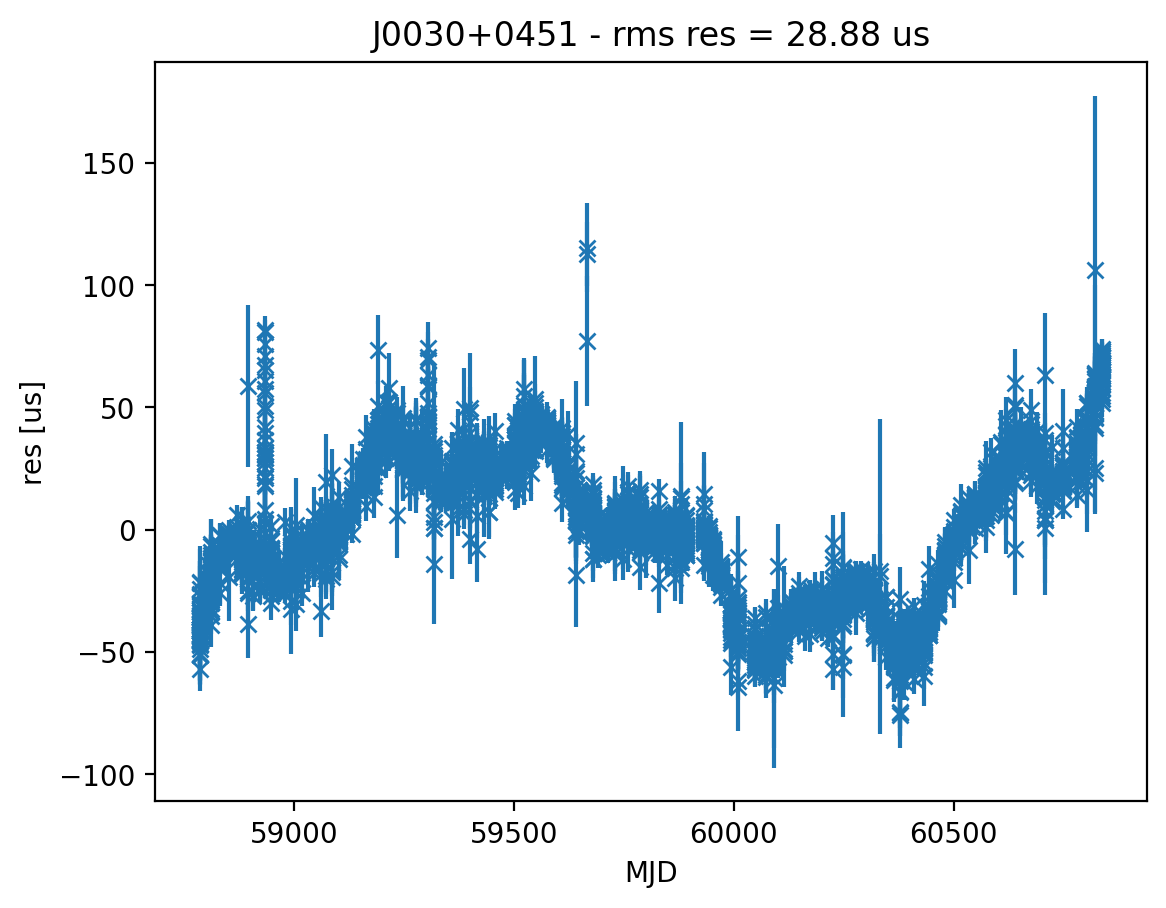

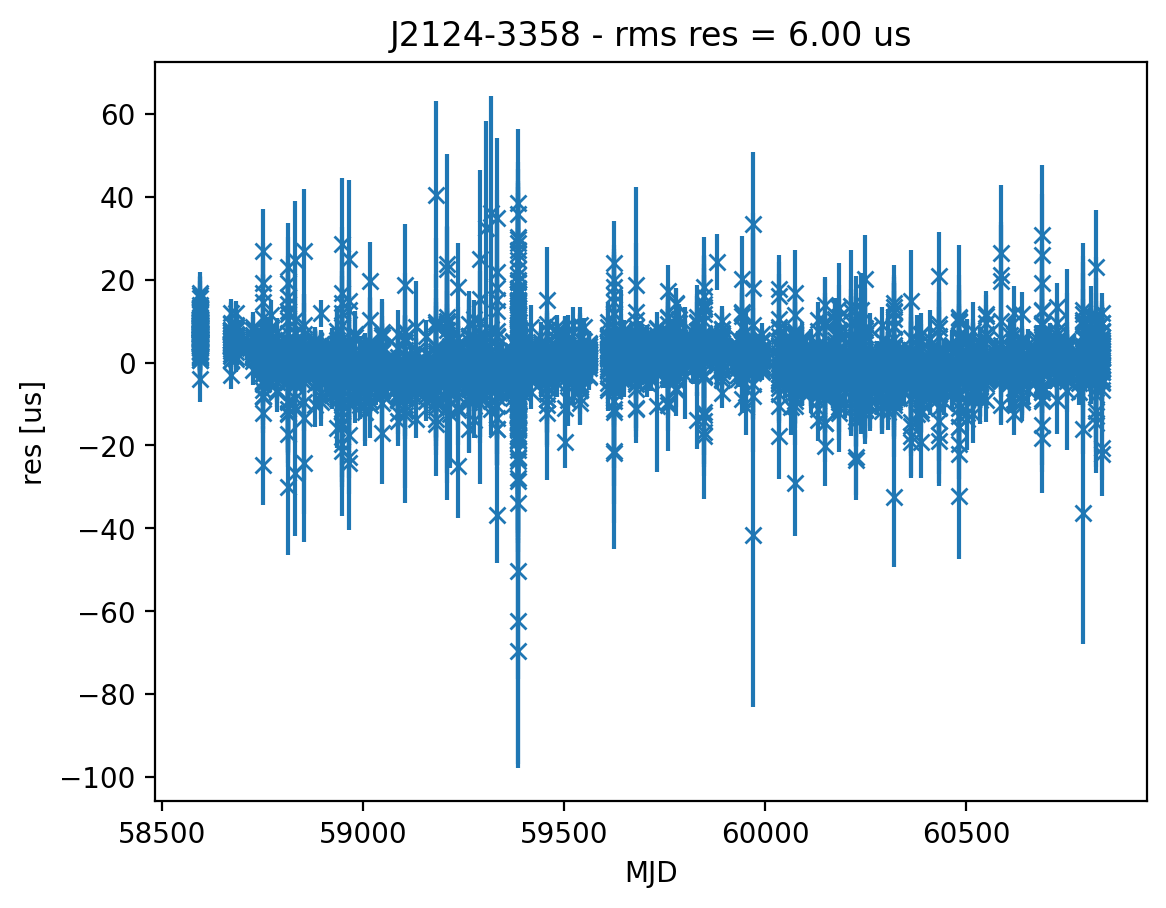

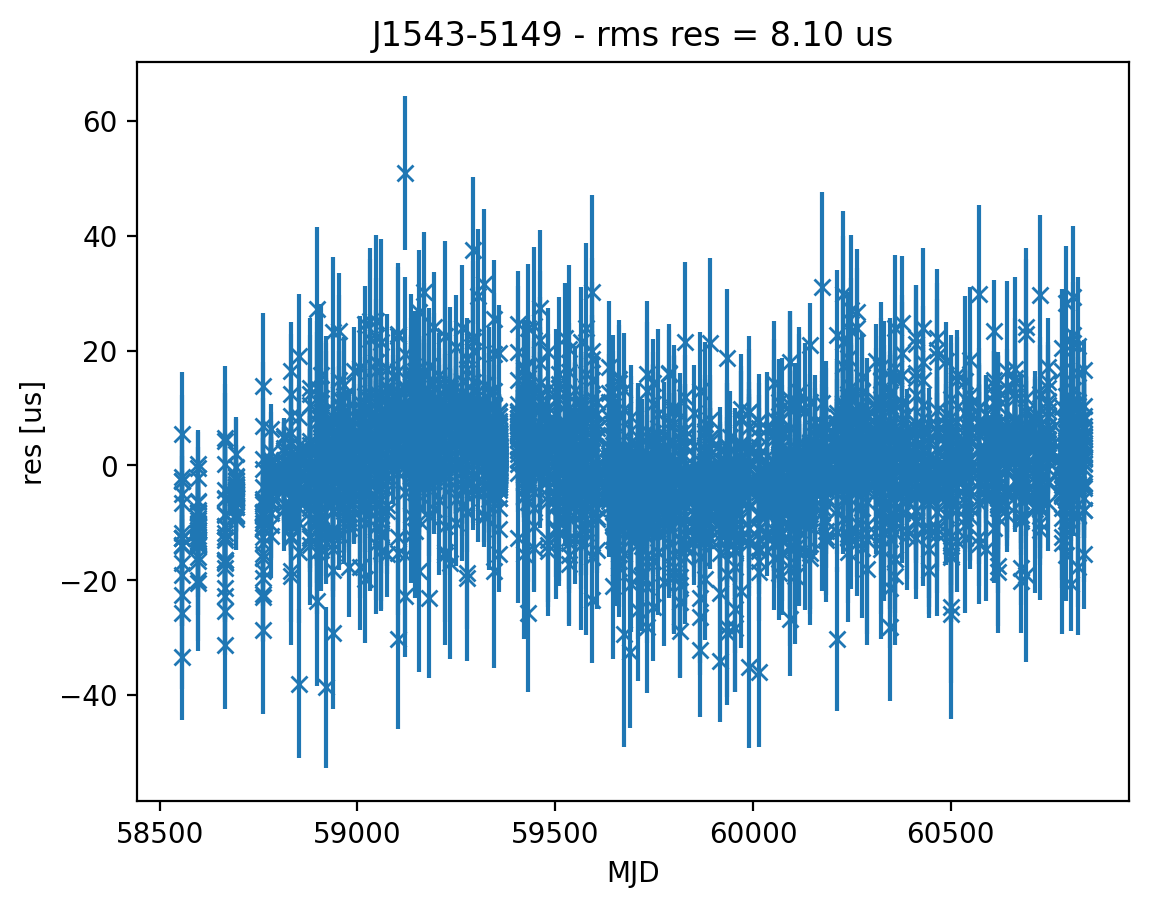

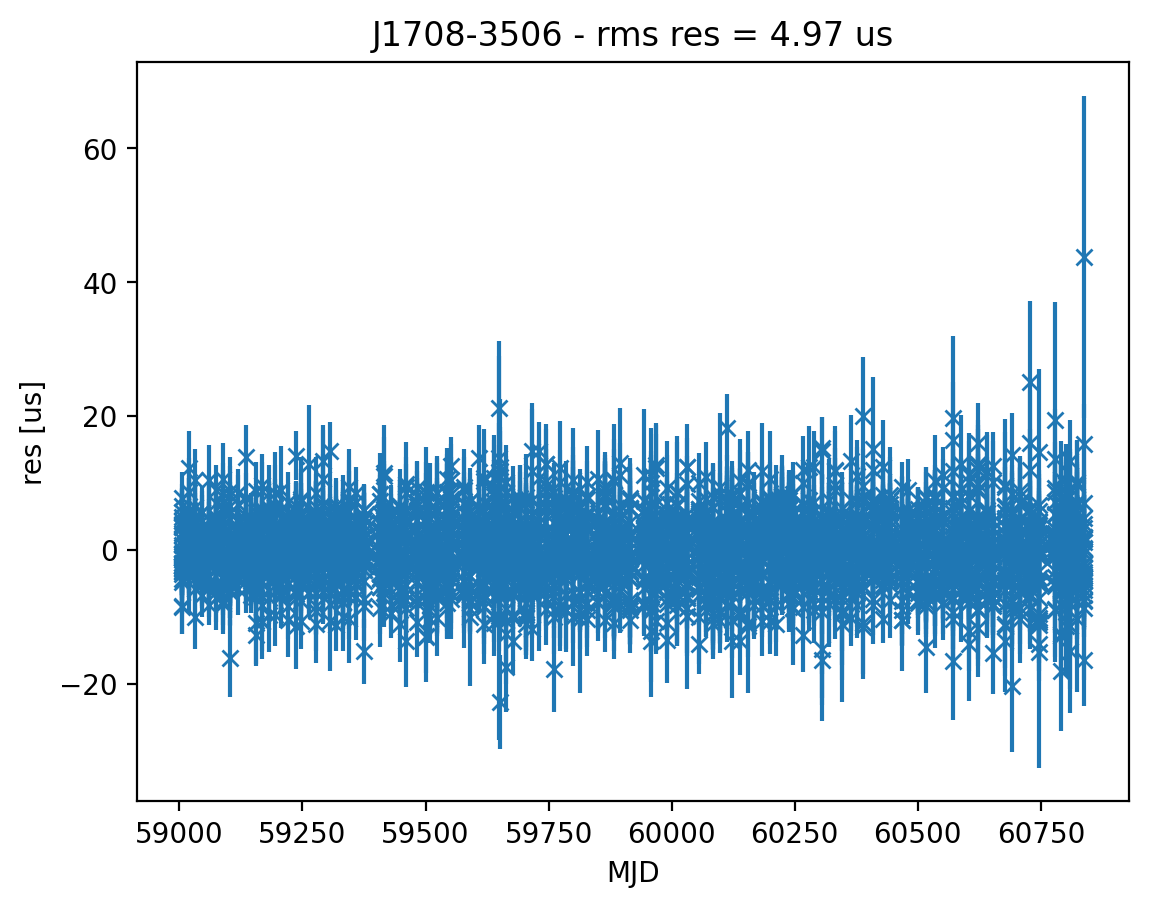

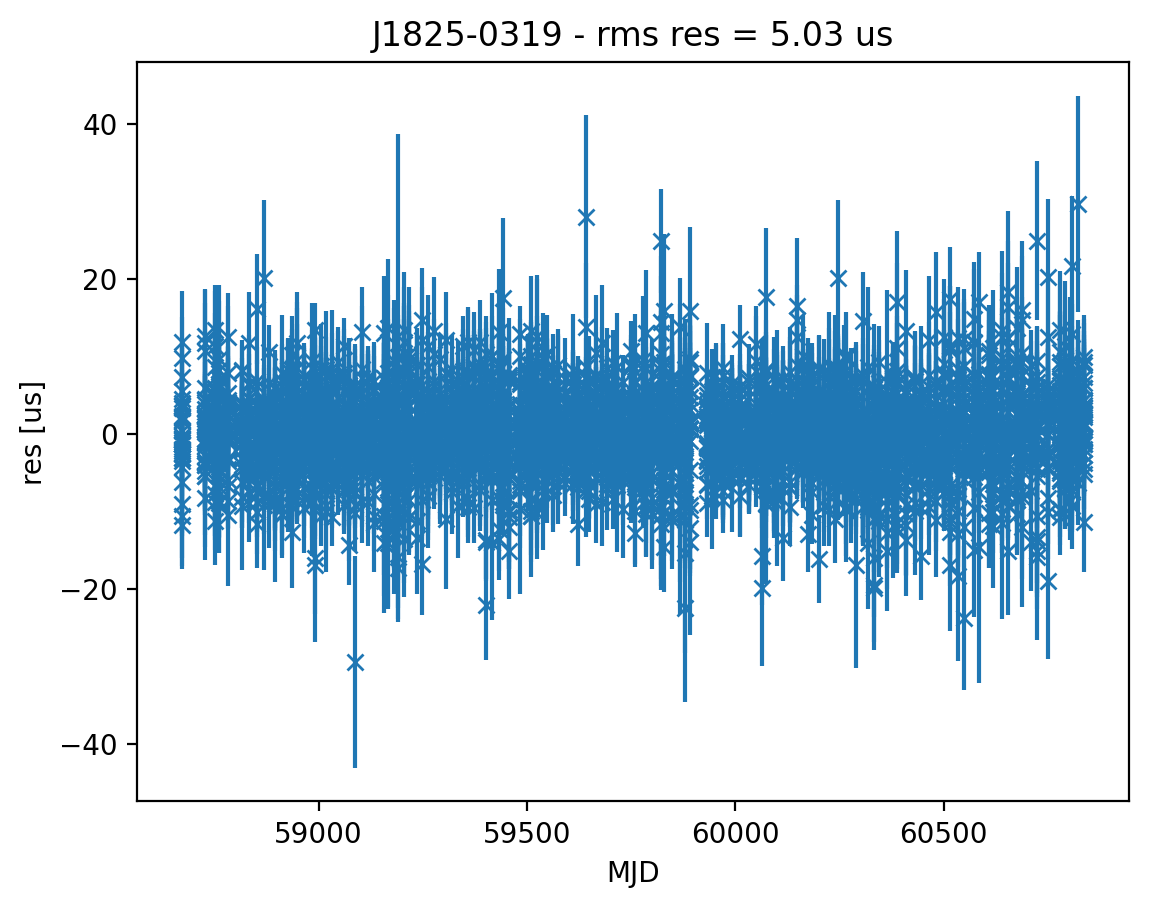

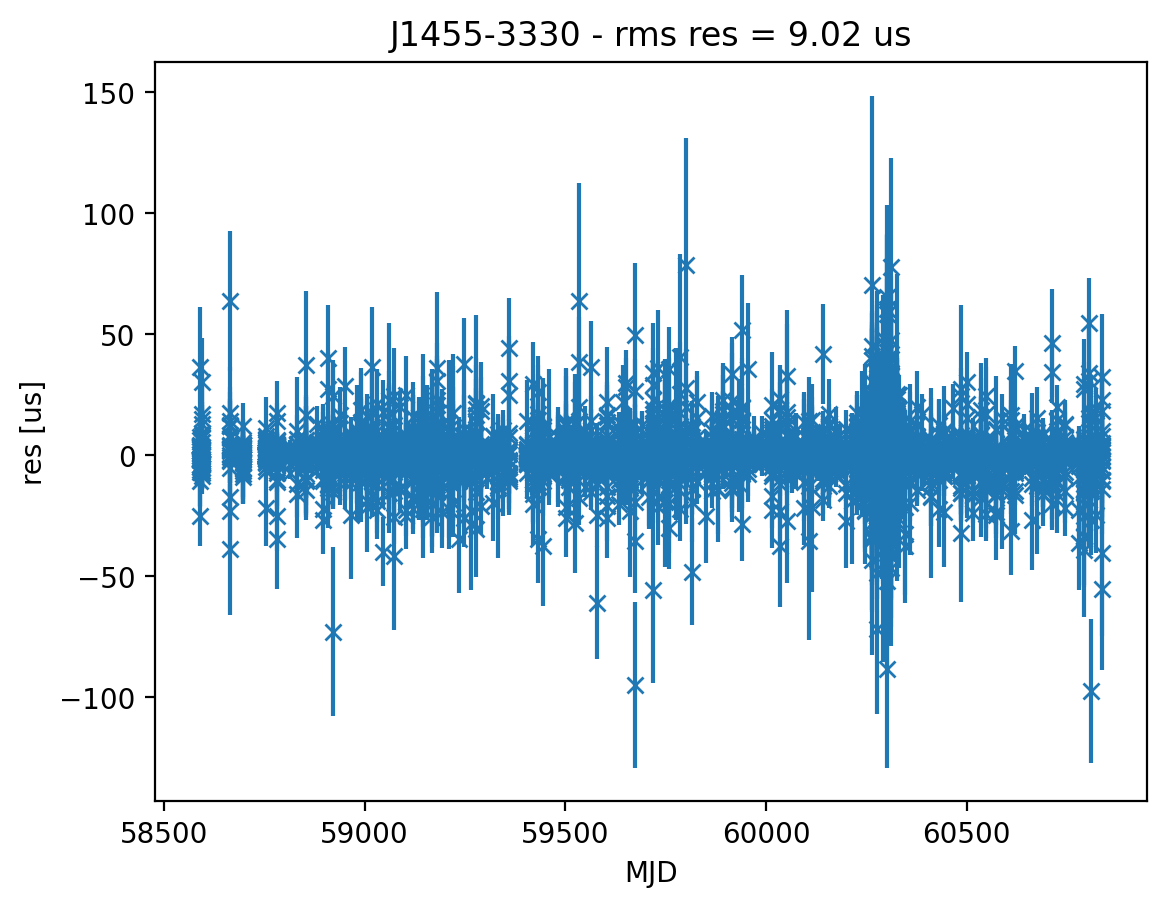

In [18]:
#plot residuals to check DM injection

for i in range(len(psrs)):
    plt.figure(i)
    LP.plotres(psrs[i])

In [30]:
# Add scattering noise

psrs, chrom_noise = add_scattering(psrs,rand=True)
print("Chromatic noise added")
print(chrom_noise)

Chromatic noise added
{'J1825-0319': {'chrom_amp': 9.922849611589547e-15, 'chrom_gamma': 1.9229016783498547}, 'J1012-4235': {'chrom_amp': 7.631163644460597e-14, 'chrom_gamma': 1.0027404490810983}, 'J1036-8317': {'chrom_amp': 2.3702582319452974e-14, 'chrom_gamma': 6.343350546009159}, 'J0125-2327': {'chrom_amp': 3.915952308010443e-14, 'chrom_gamma': 1.7452369135048353}, 'J0030+0451': {'chrom_amp': 3.283627281430285e-14, 'chrom_gamma': 6.7601729806985515}, 'J2124-3358': {'chrom_amp': 1.7312415451386268e-14, 'chrom_gamma': 4.000585399837718}, 'J1543-5149': {'chrom_amp': 4.175334588709987e-15, 'chrom_gamma': 5.626080219051102}, 'J1708-3506': {'chrom_amp': 3.356741520810822e-14, 'chrom_gamma': 2.082120309106121}, 'J1455-3330': {'chrom_amp': 7.598700797516065e-14, 'chrom_gamma': 6.072372254071653}}


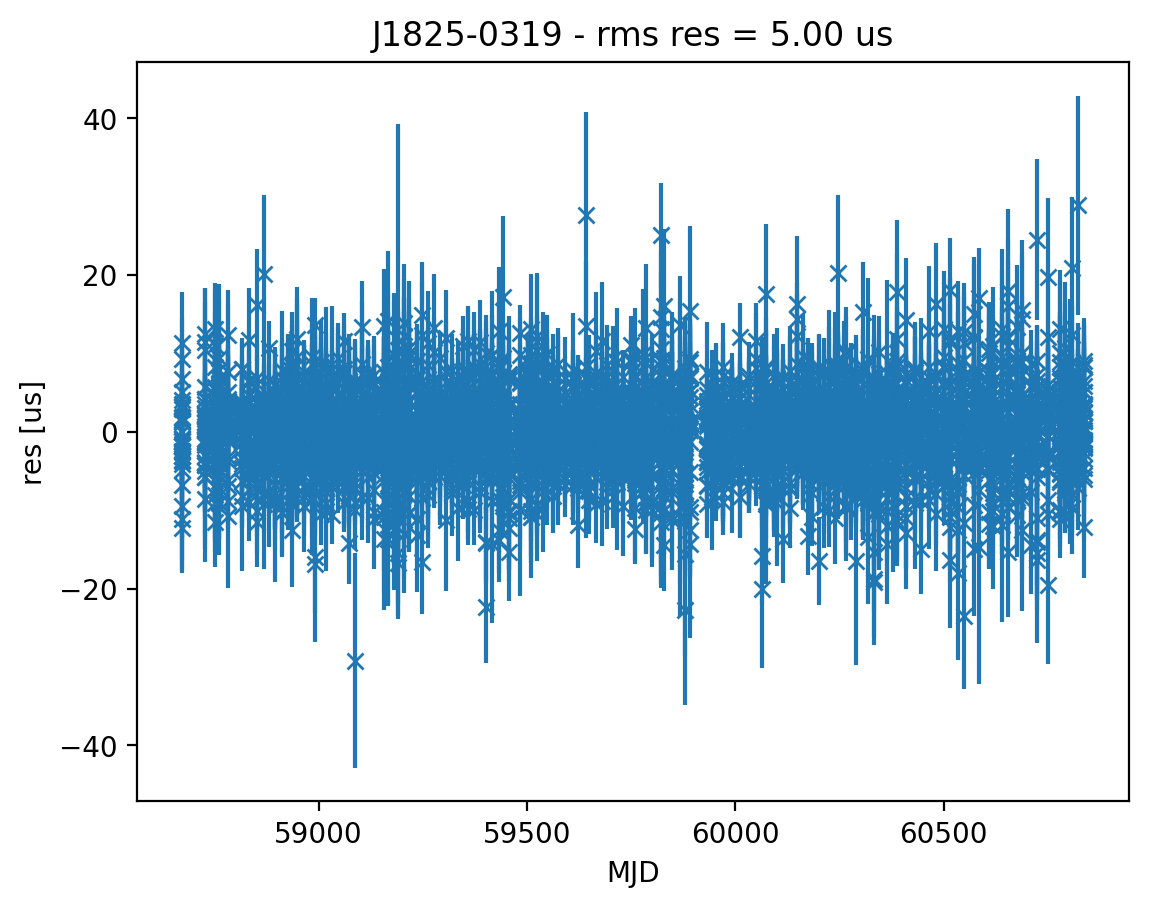

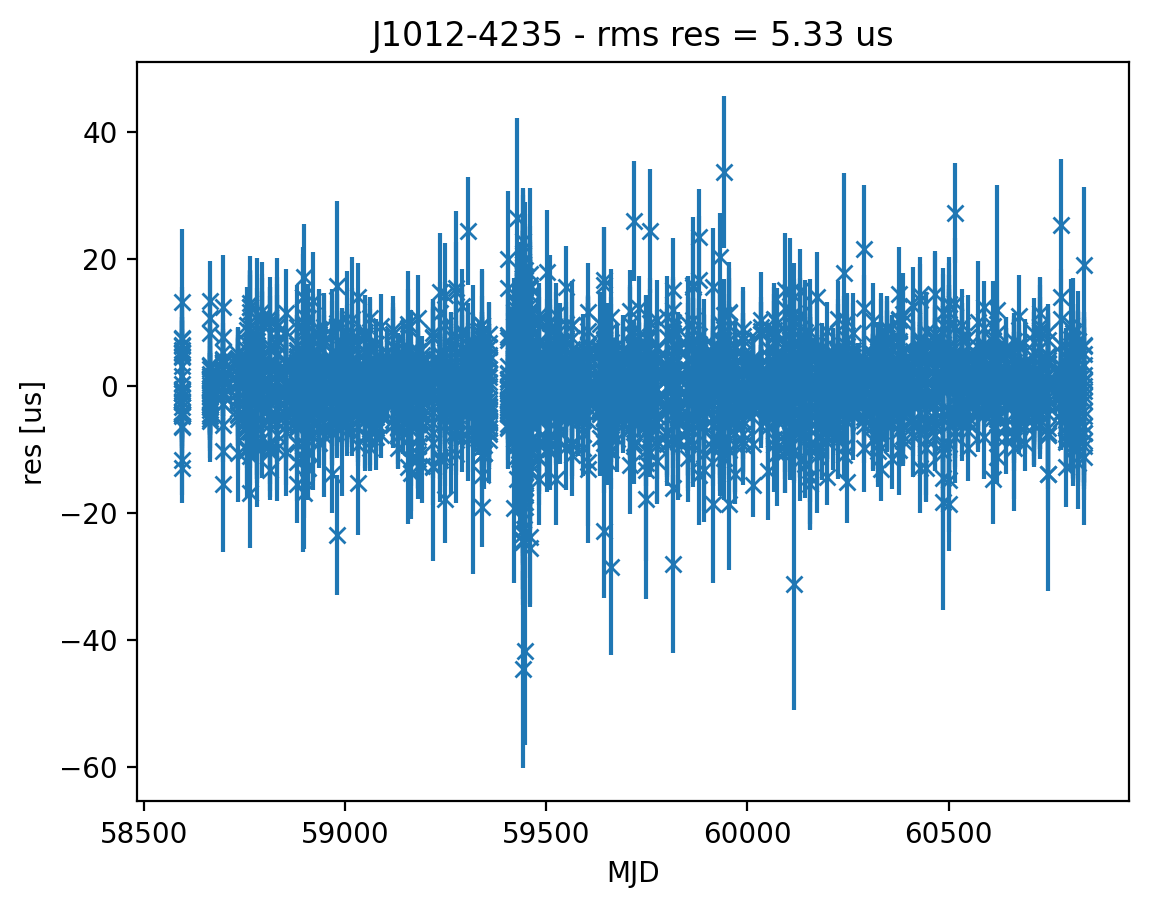

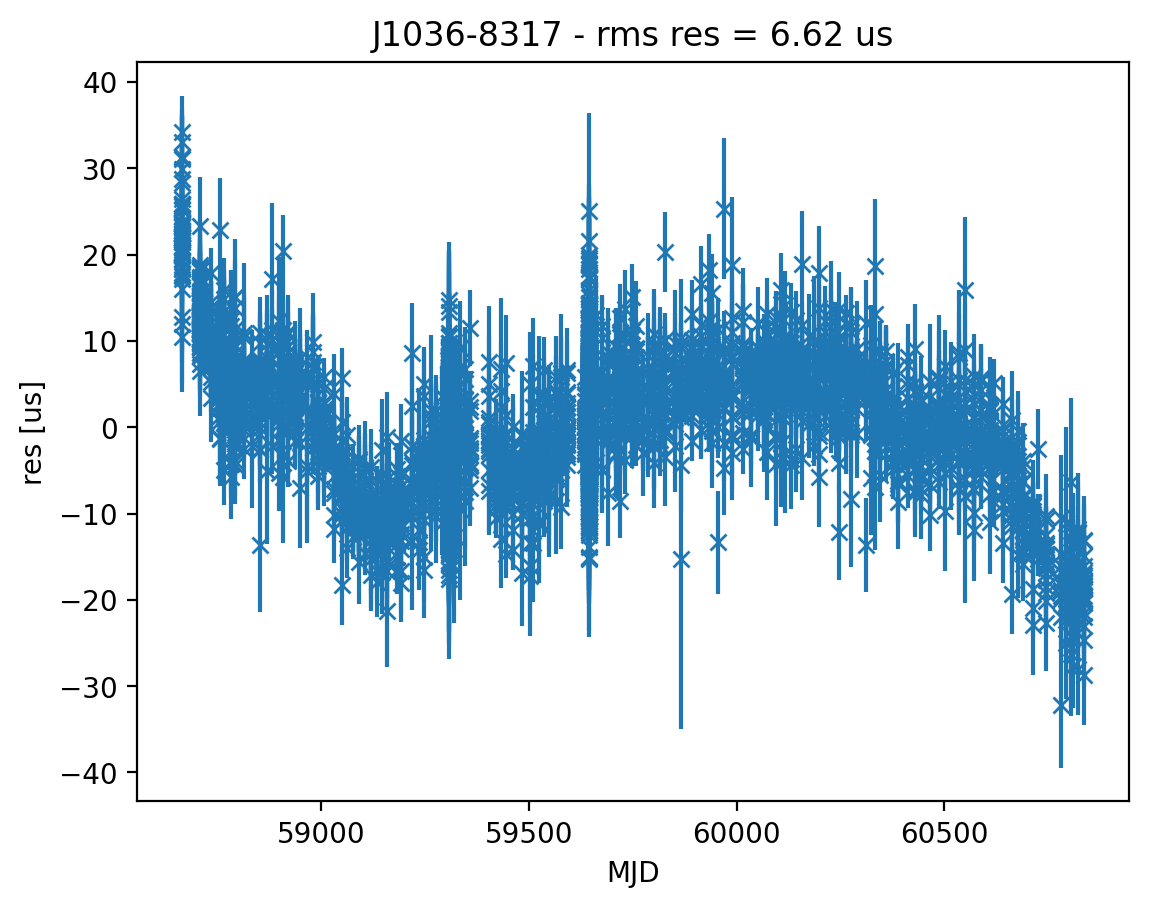

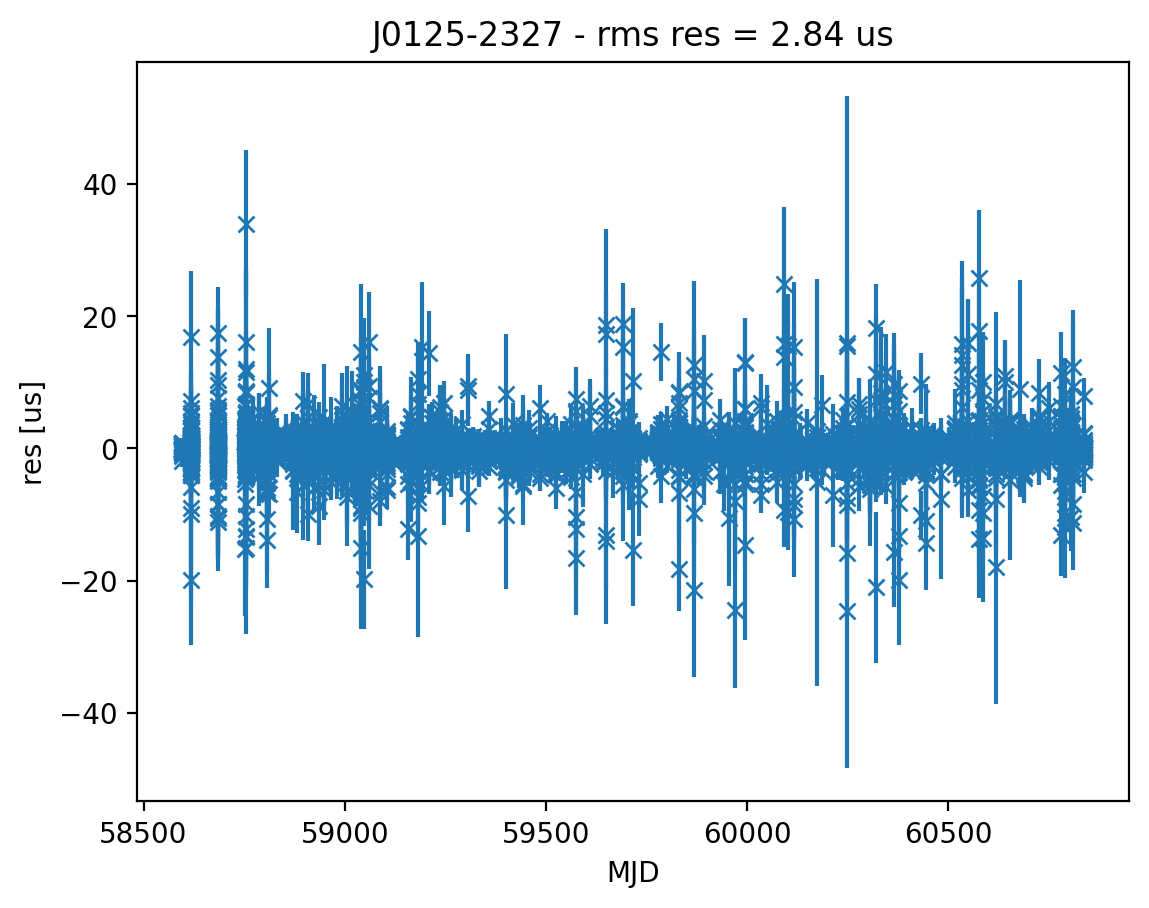

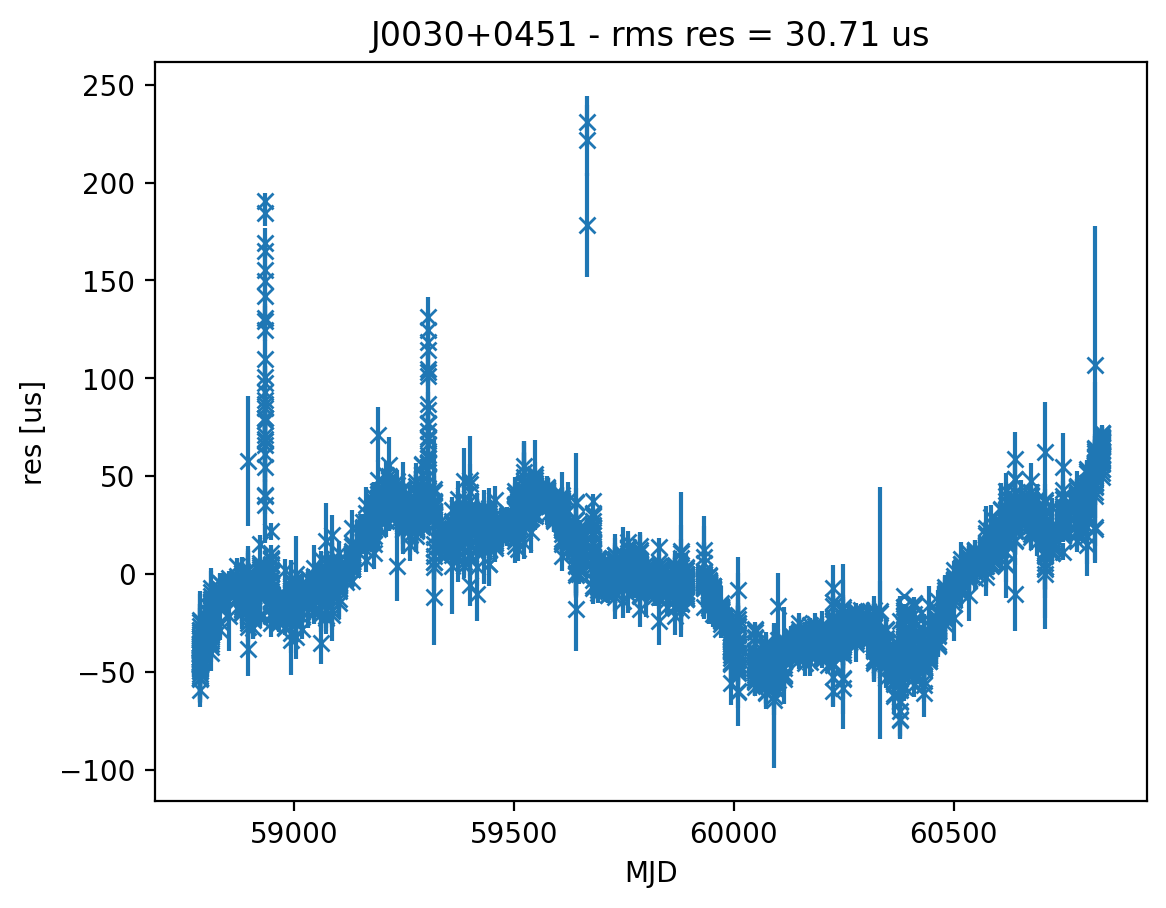

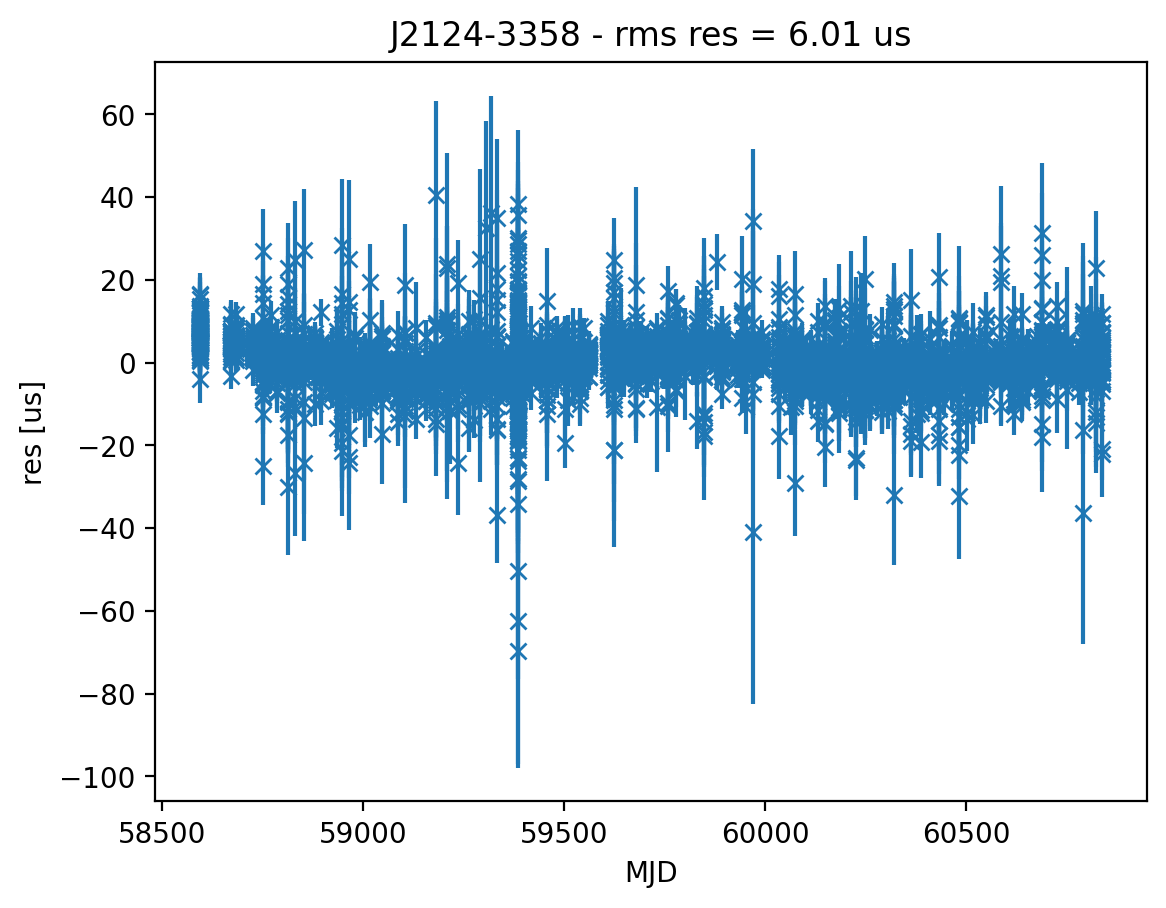

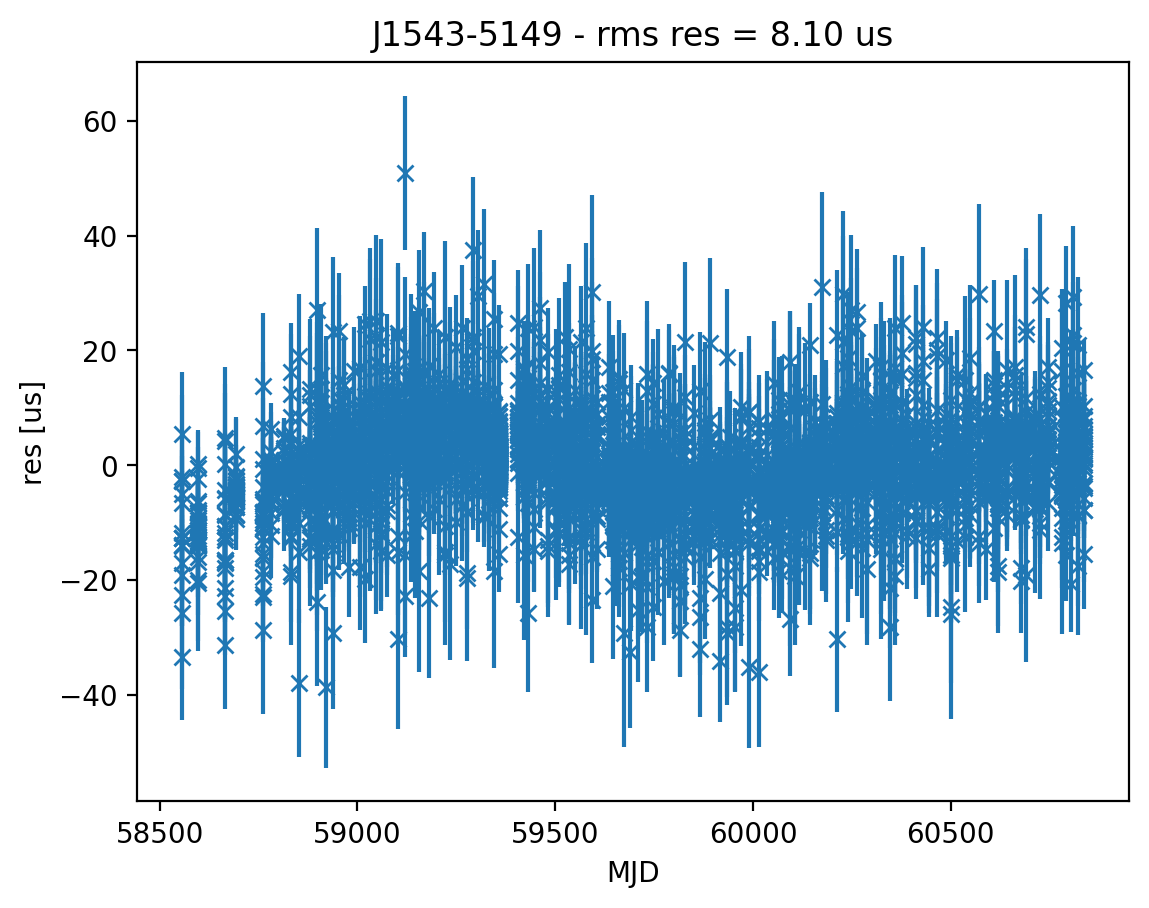

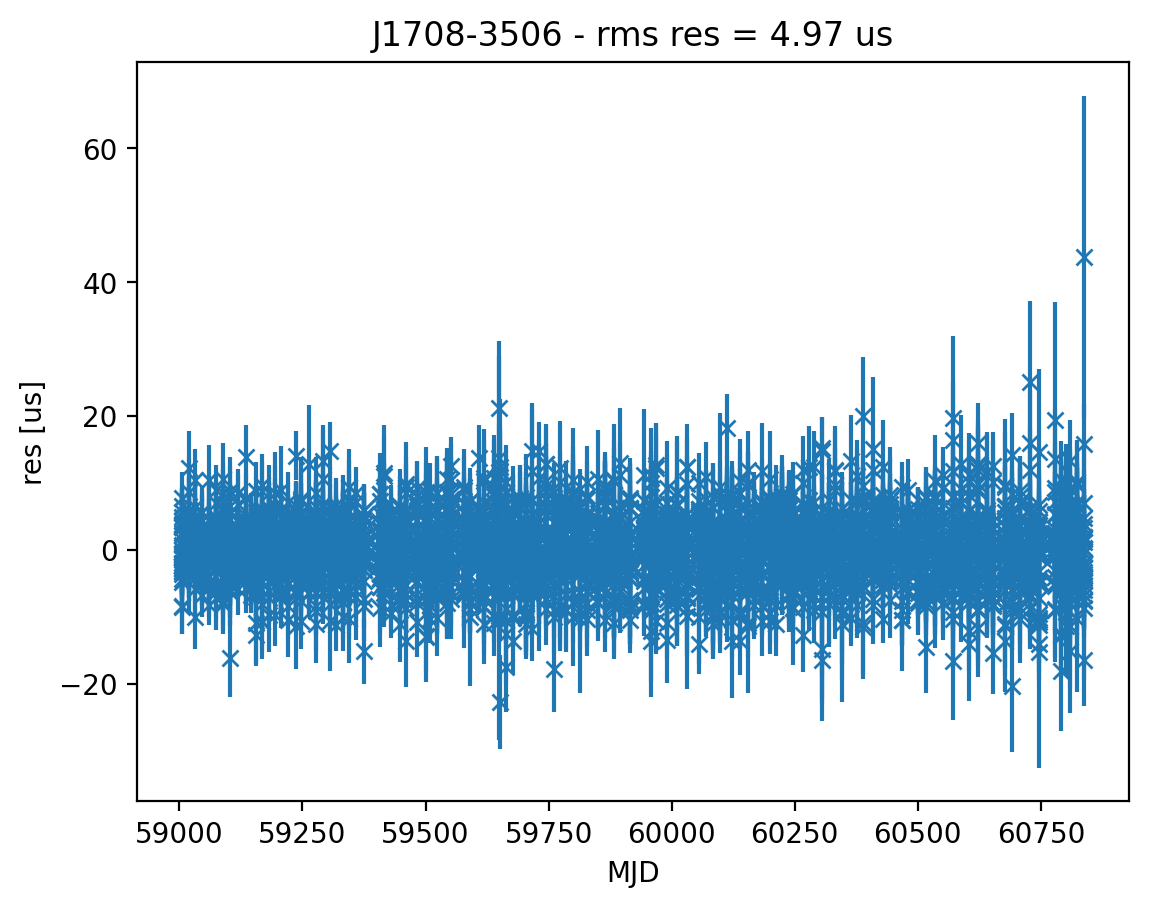

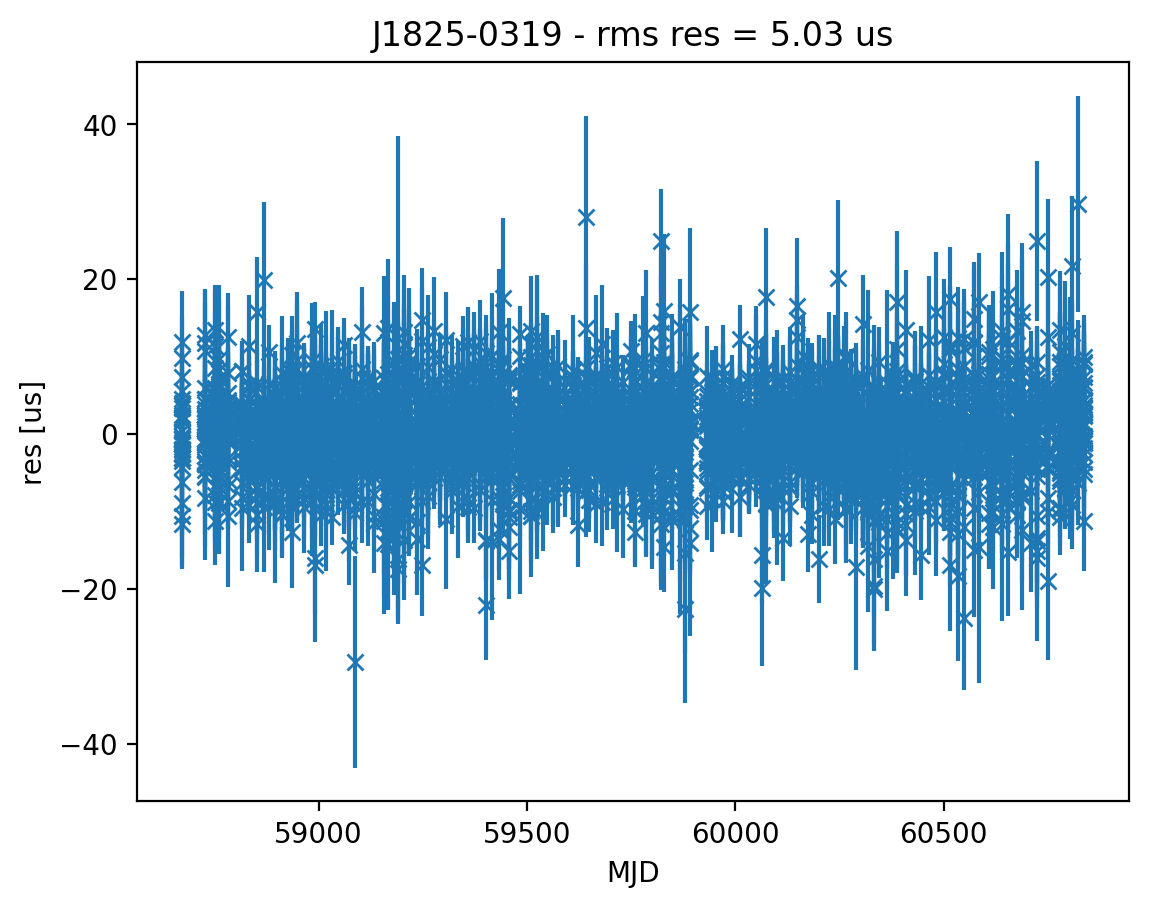

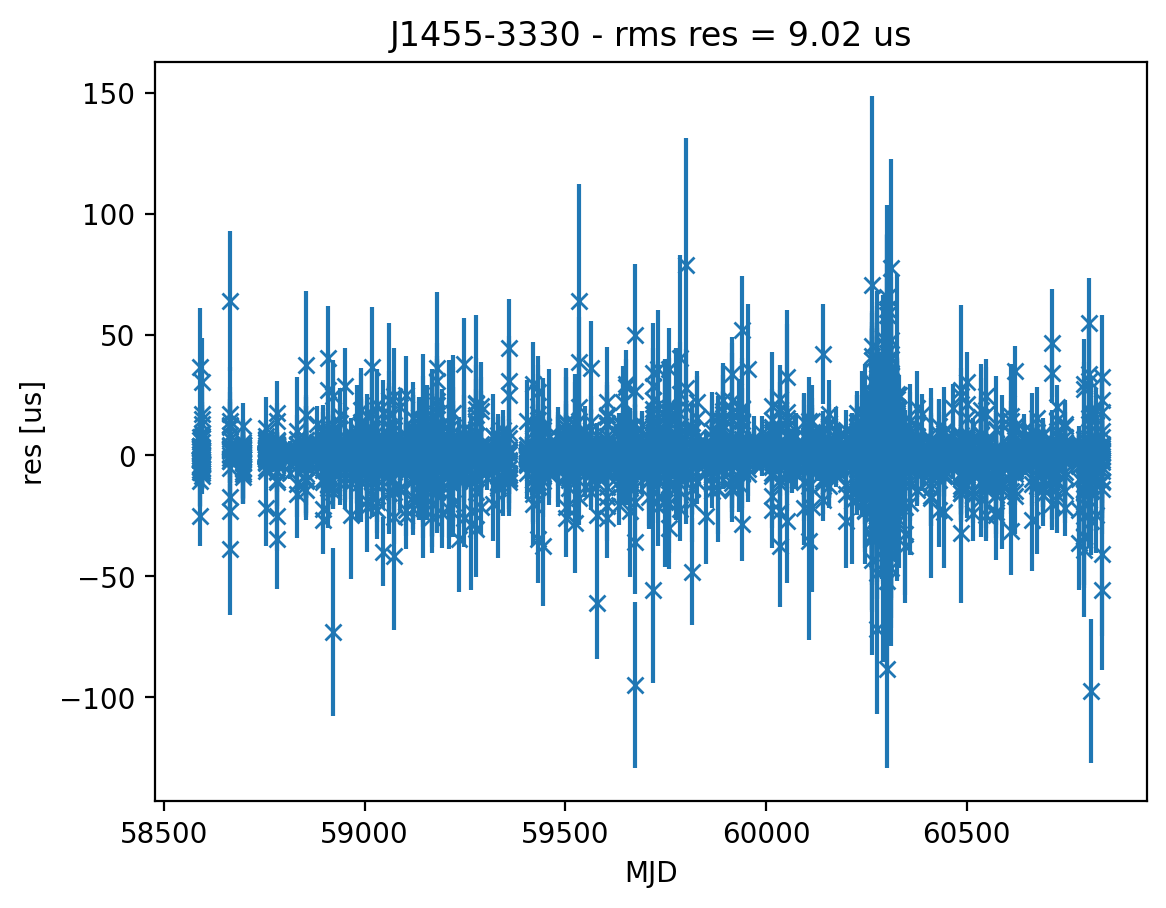

In [31]:
#plot residuals to check scattering noise injection

for i in range(len(psrs)):
    plt.figure(i)
    LP.plotres(psrs[i])

In [32]:
# Inject a GWB
add_gwb(psrs)
print("GWB added")


GWB added


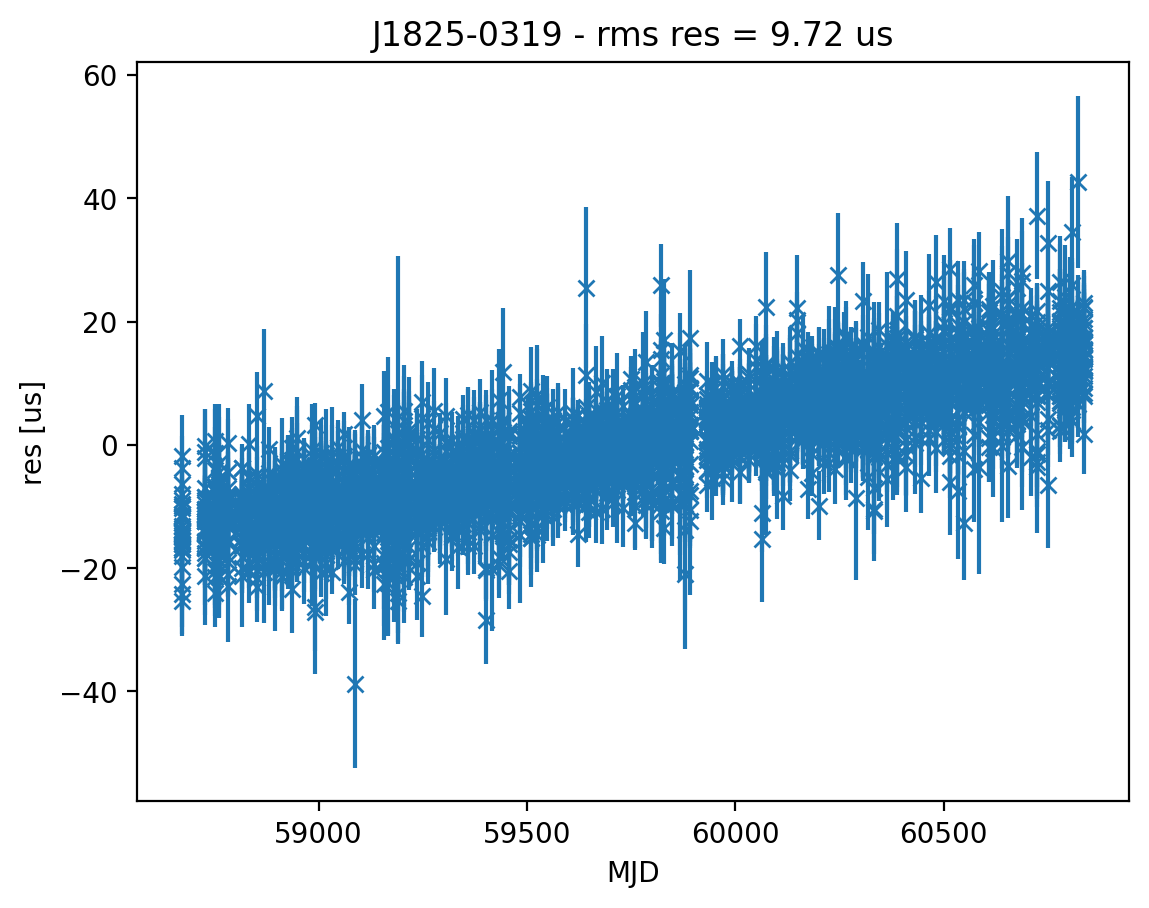

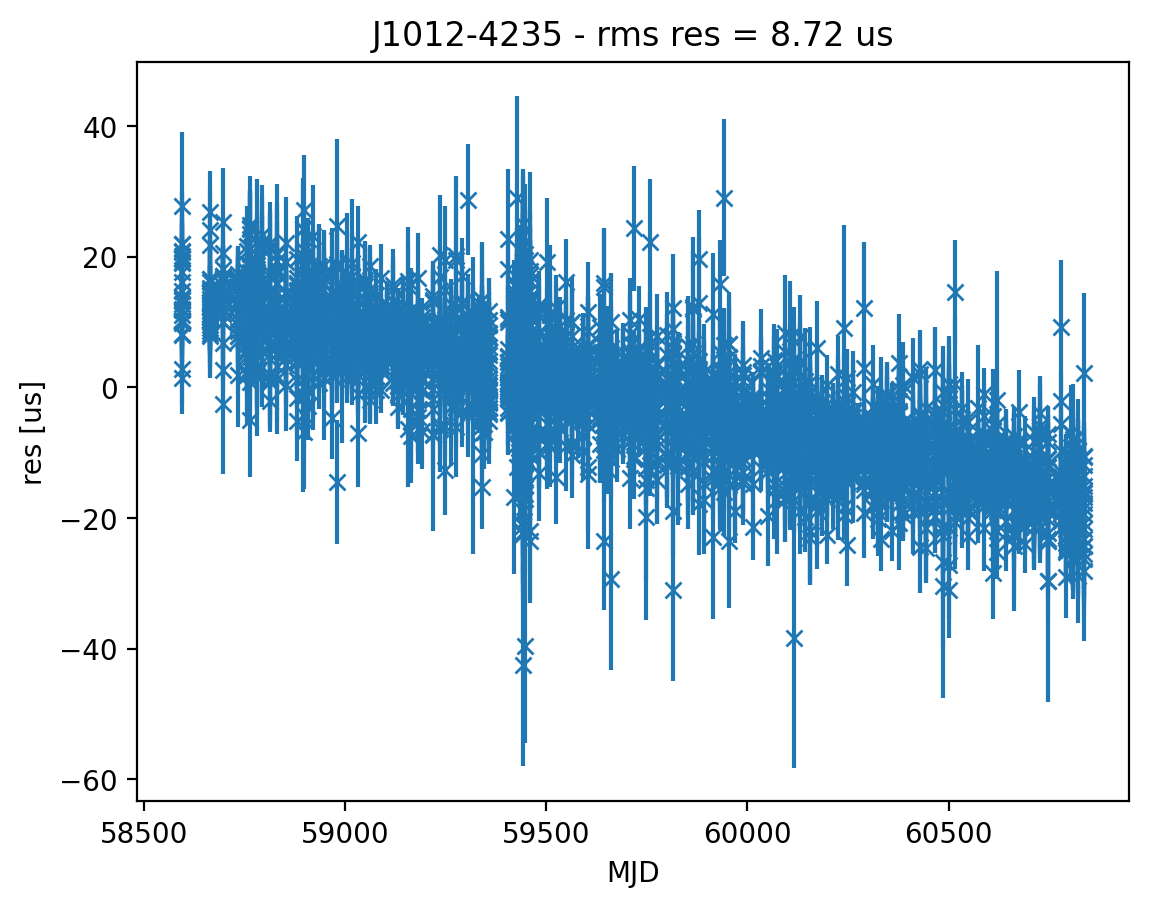

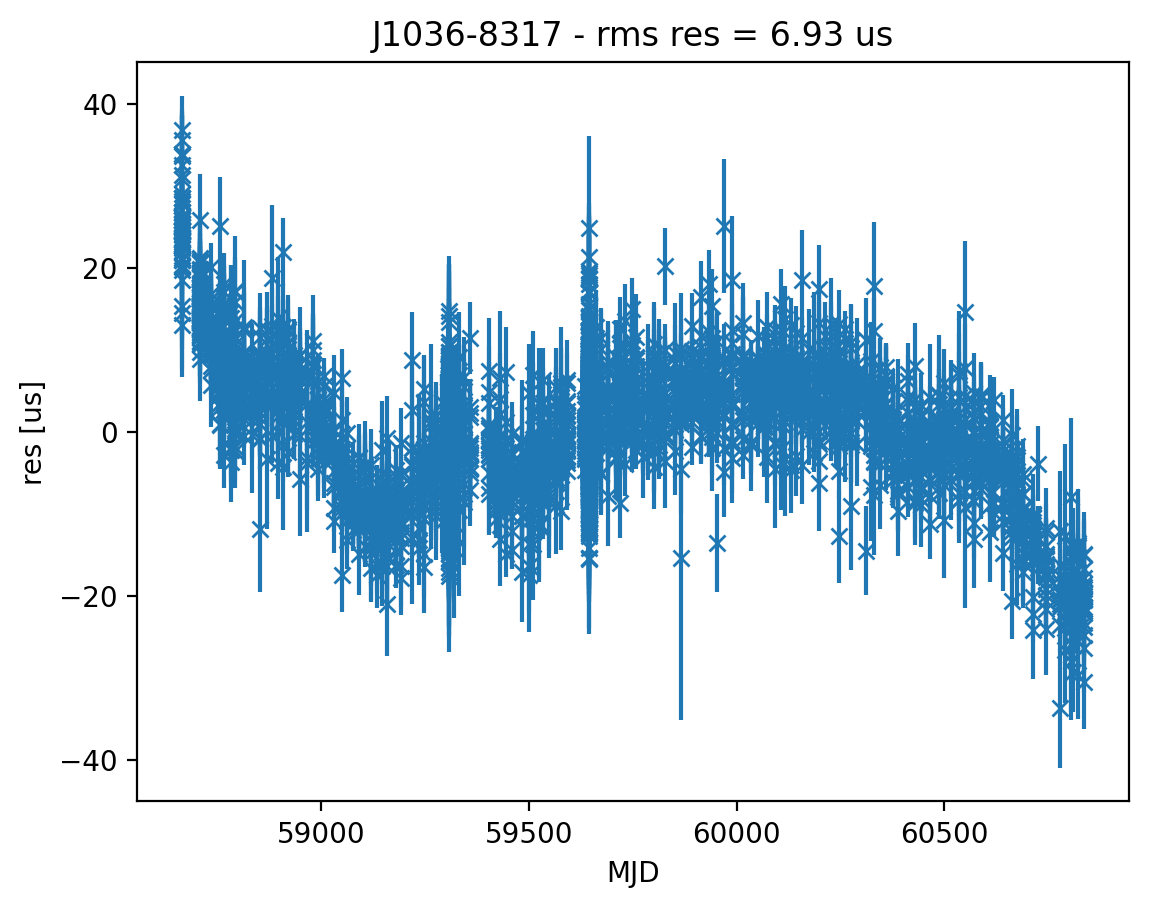

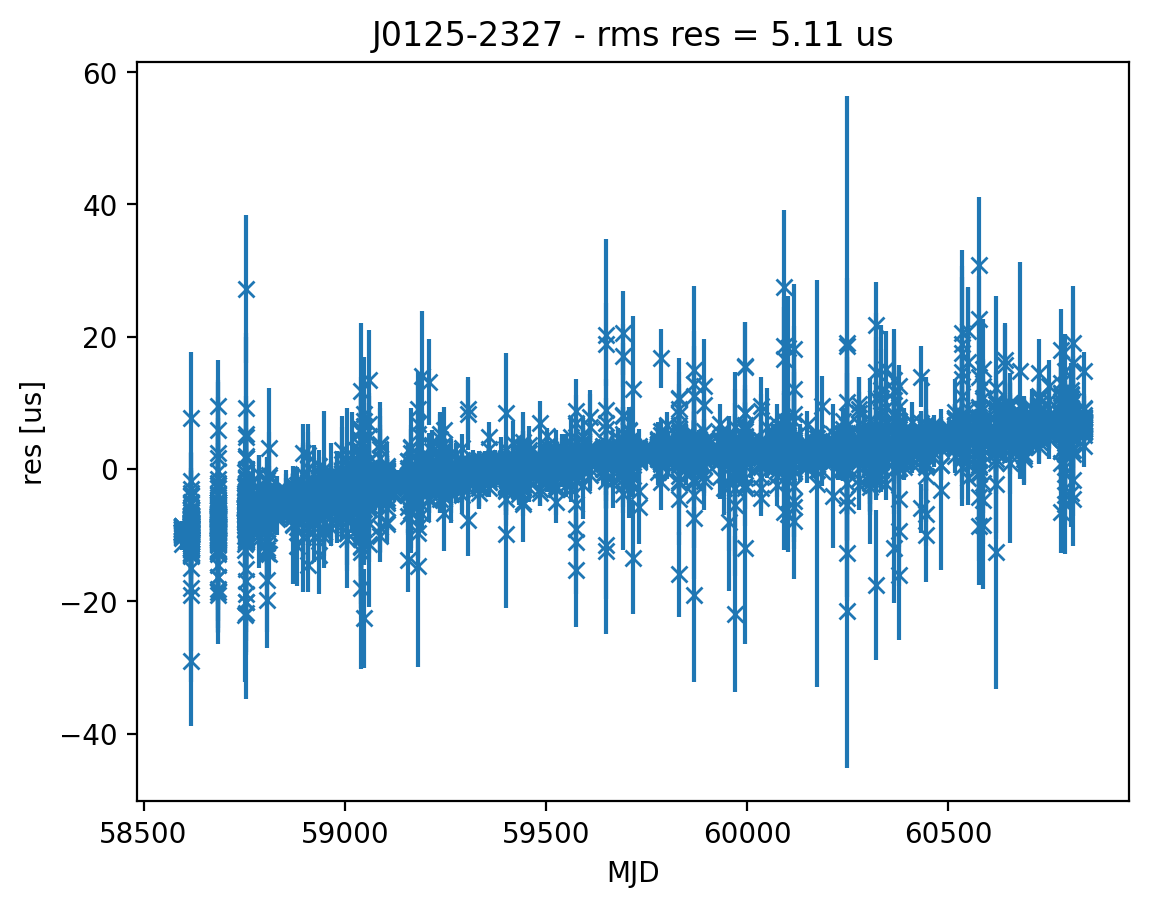

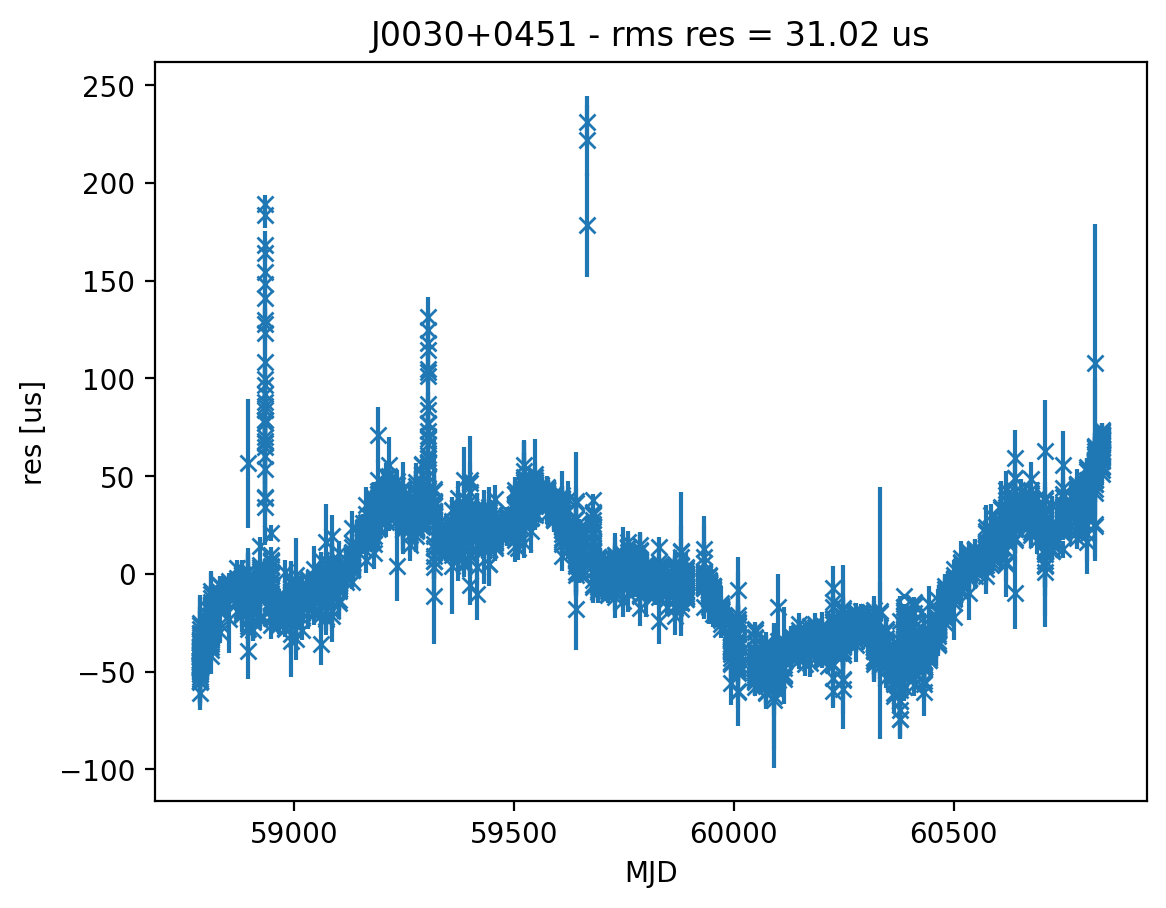

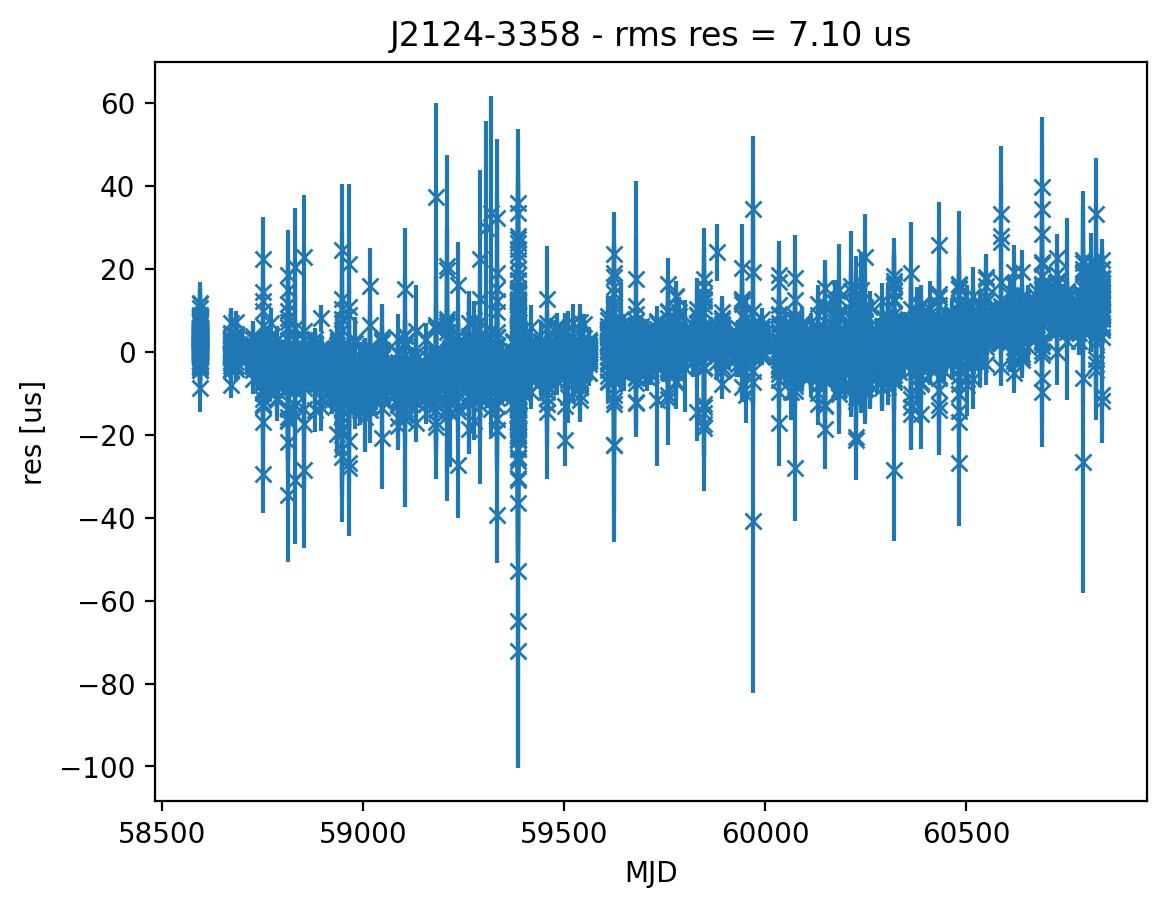

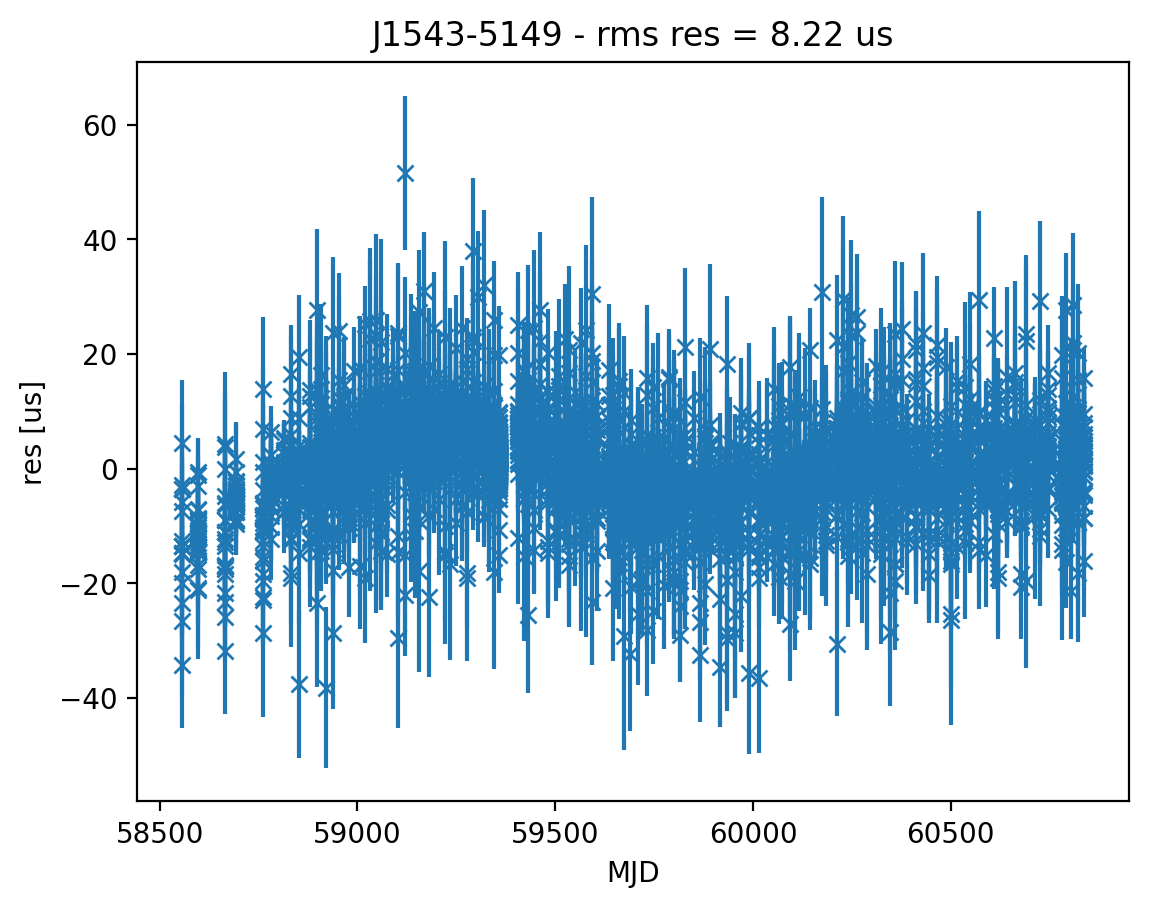

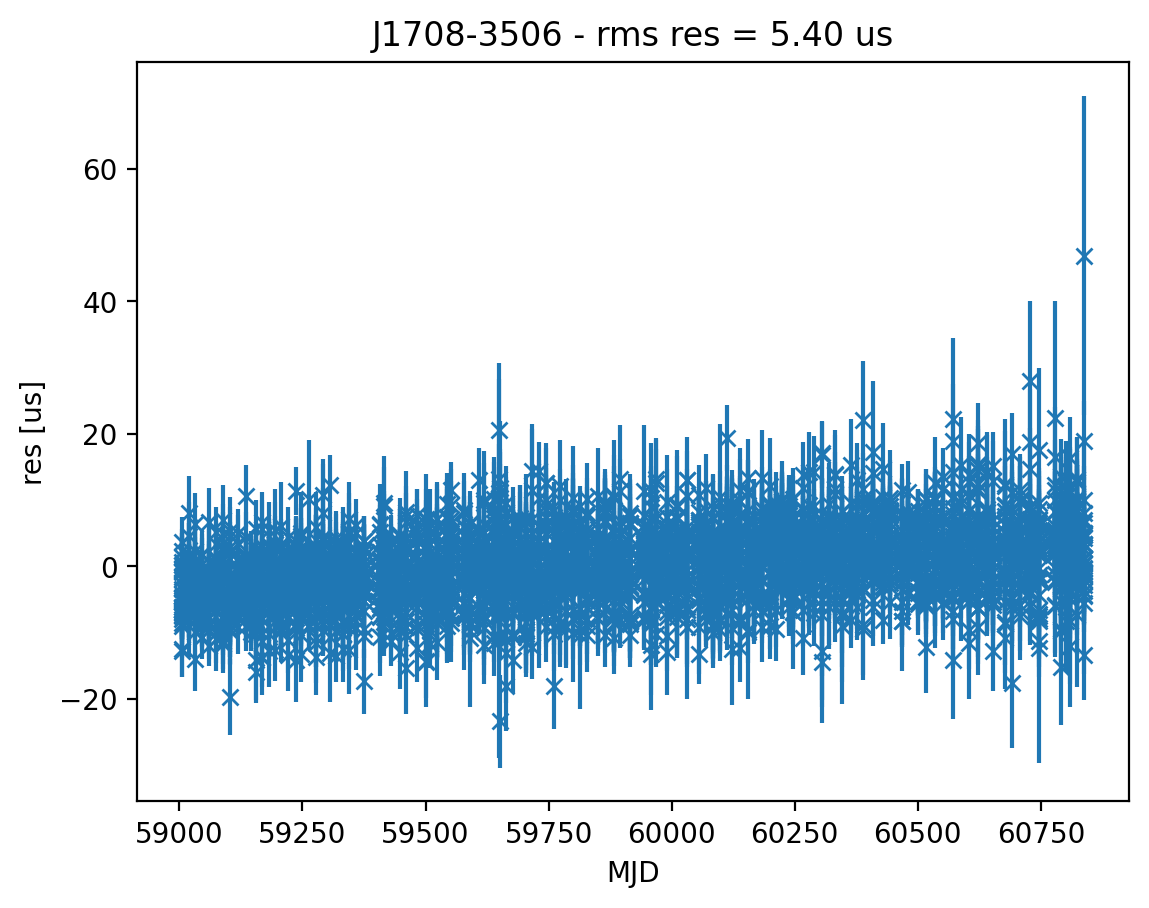

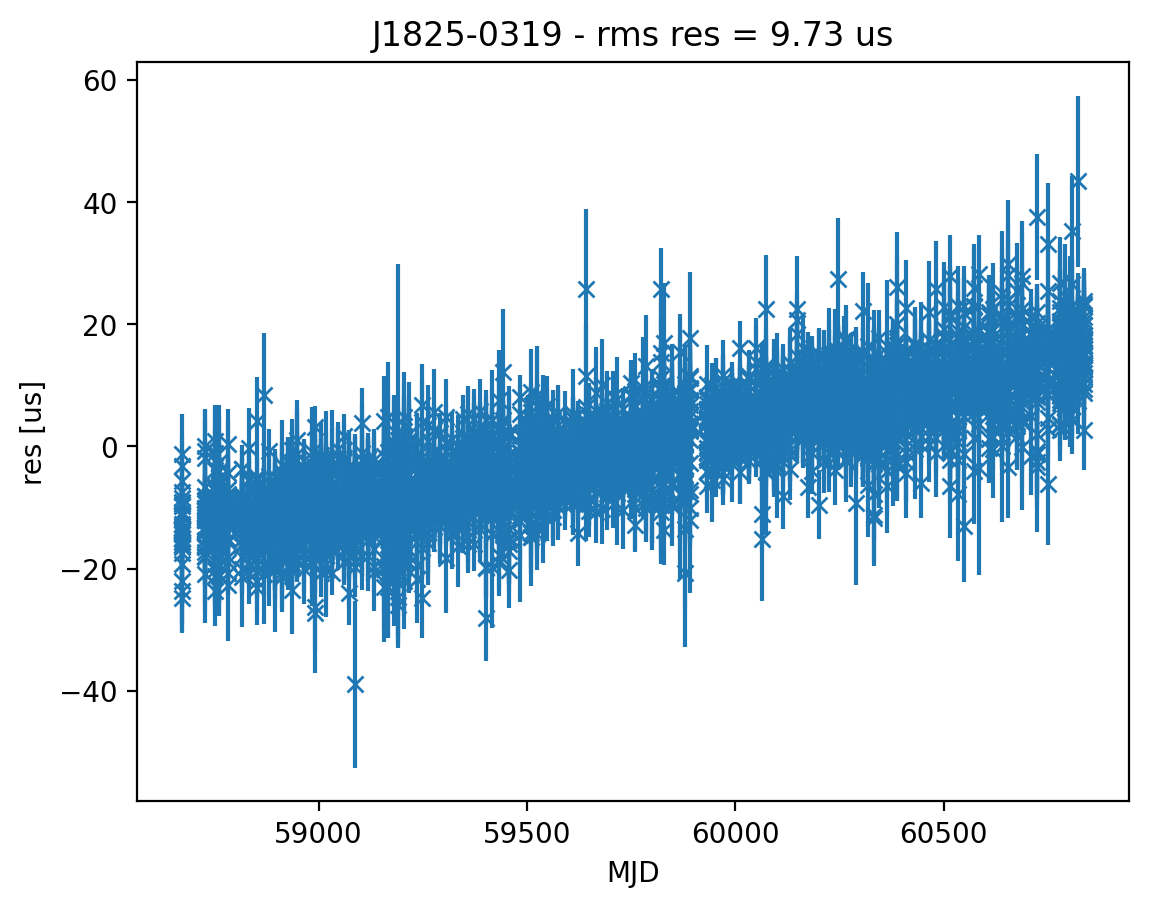

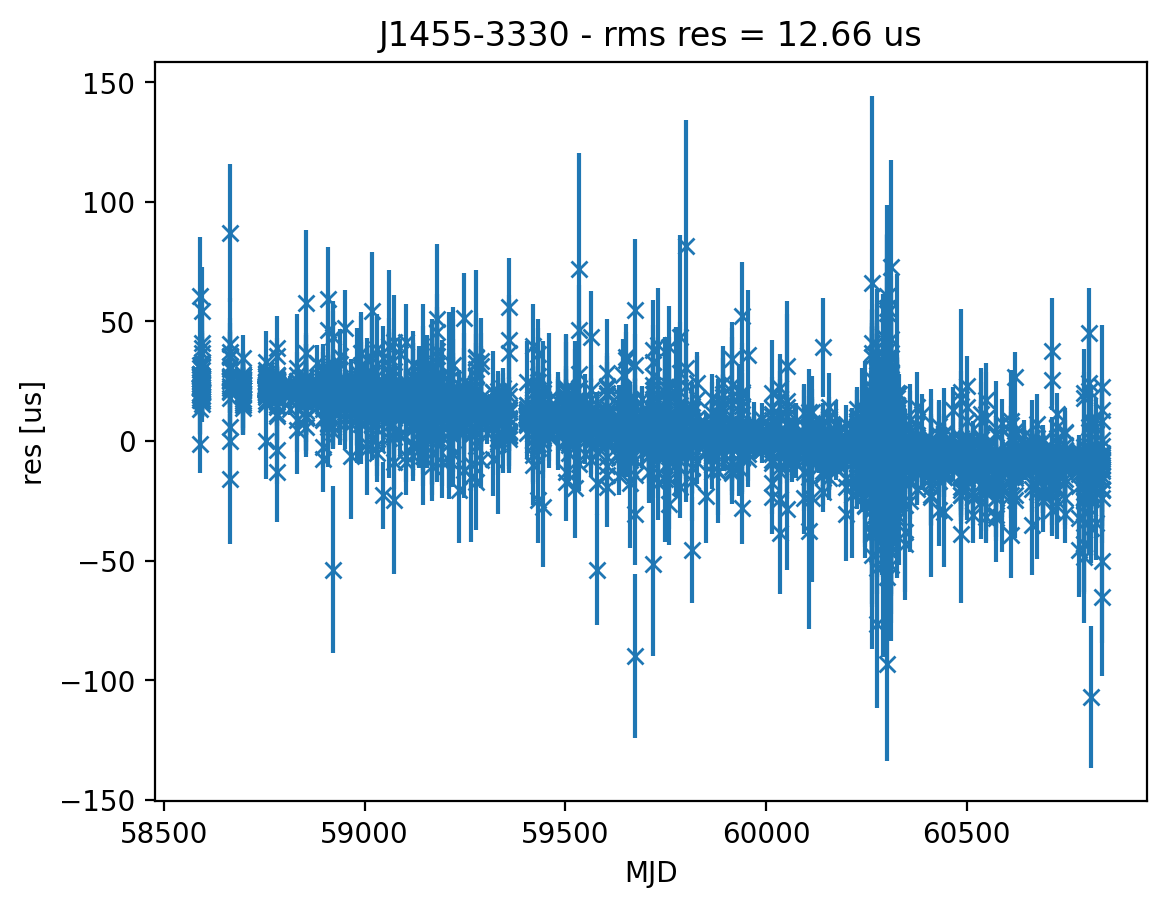

In [33]:
#plot residuals to check GWB injection

for i in range(len(psrs)):
    plt.figure(i)
    LP.plotres(psrs[i])

In [34]:
#Blind injection of CW parameters based on old simms. Need to check that this is not a terrible dict to use.

cw_p_dict = {
    'gwtheta': 1.75,  
    'gwphi': 5.,  
    'mc': 5e9,  
    'dist': 60, 
    'fgw': 2e-8, 
    'phase0': 0.0,
    'psi': np.pi/4.0,
    'inc': 0.0,
}

In [36]:
tref = np.min([p.toas().min() for p in psrs])

In [37]:
add_cgw(psrs, cw_p_dict, tref, iters=10)

J1825-0319
J1012-4235
J1036-8317
J0125-2327
J0030+0451
J2124-3358
J1543-5149
J1708-3506
J1825-0319
J1455-3330 had timing model fit issue. Excluding from PTA.


In [ ]:
#plot residuals to check CW injection

for i in range(len(psrs)):
    plt.figure(i)
    LP.plotres(psrs[i])

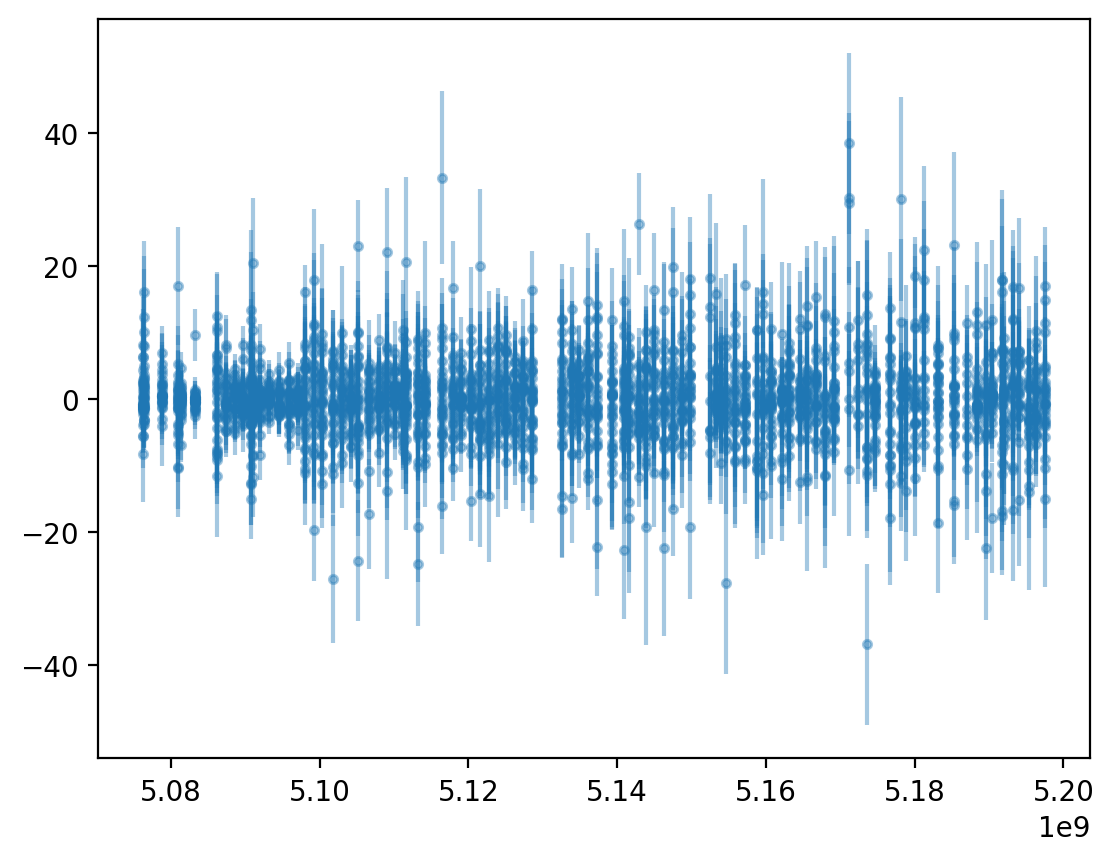

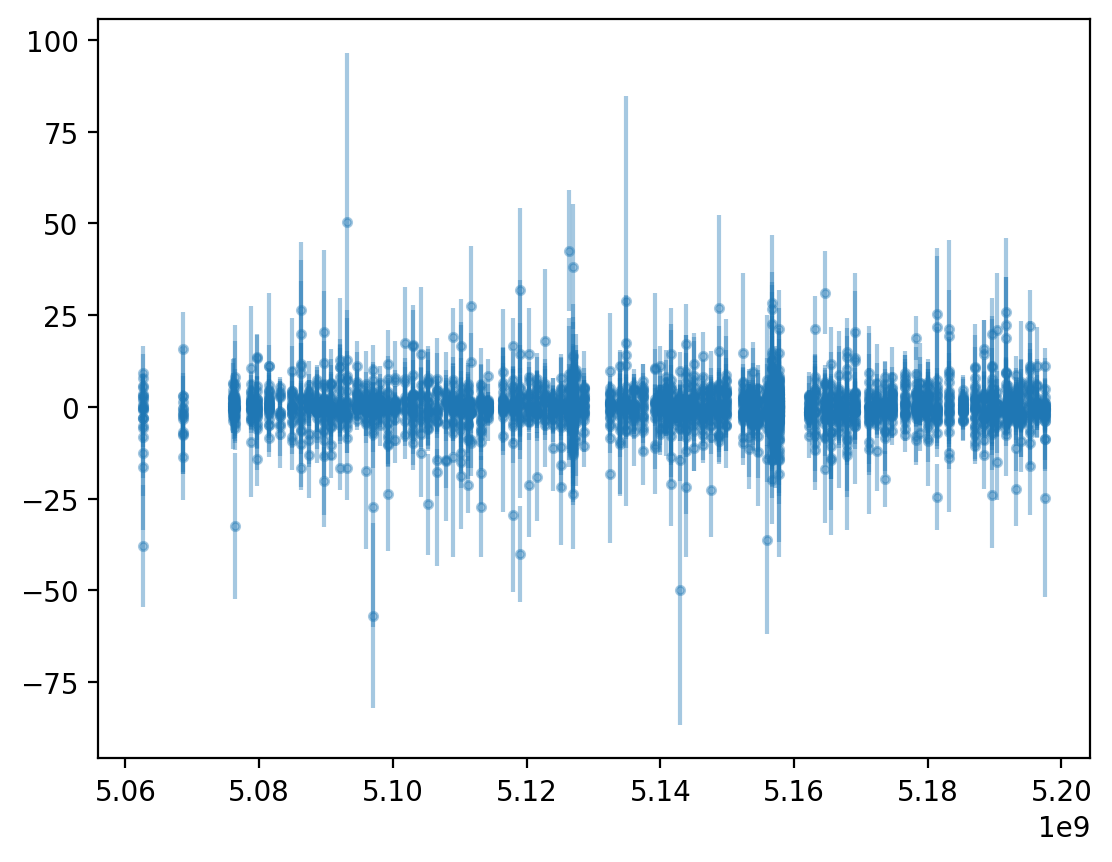

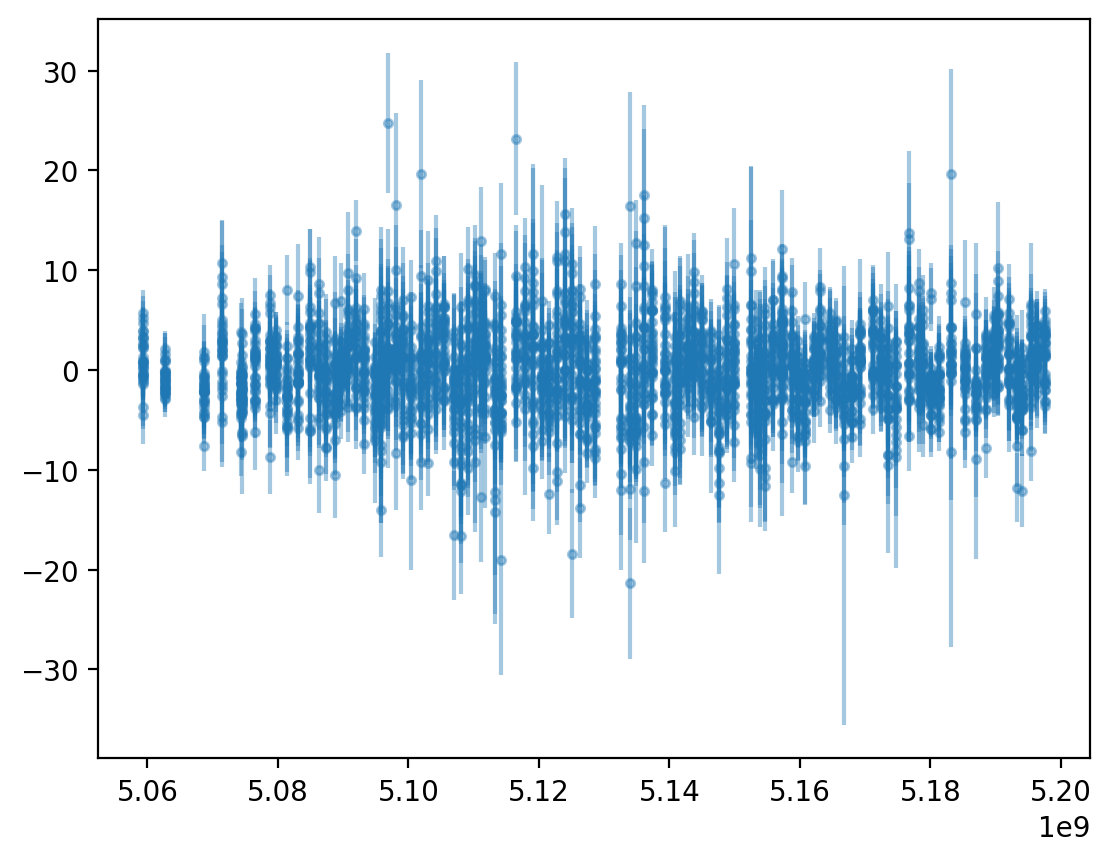

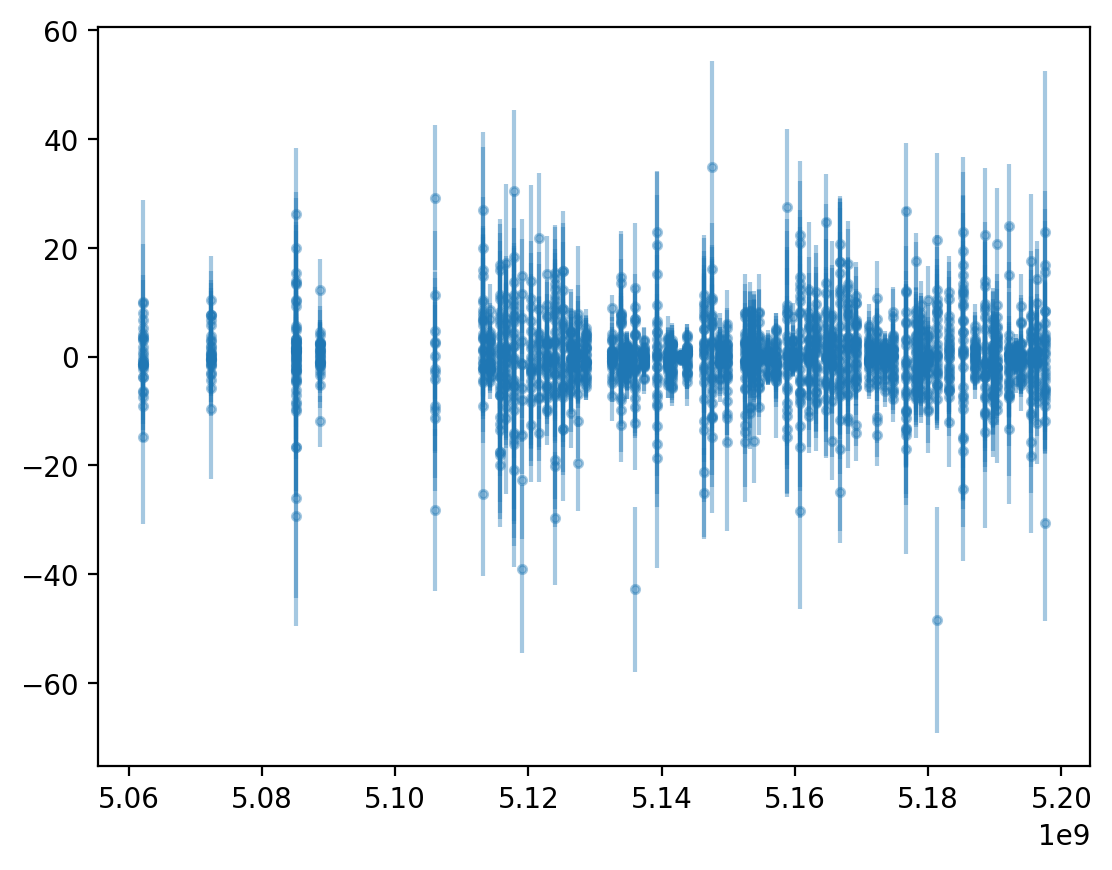

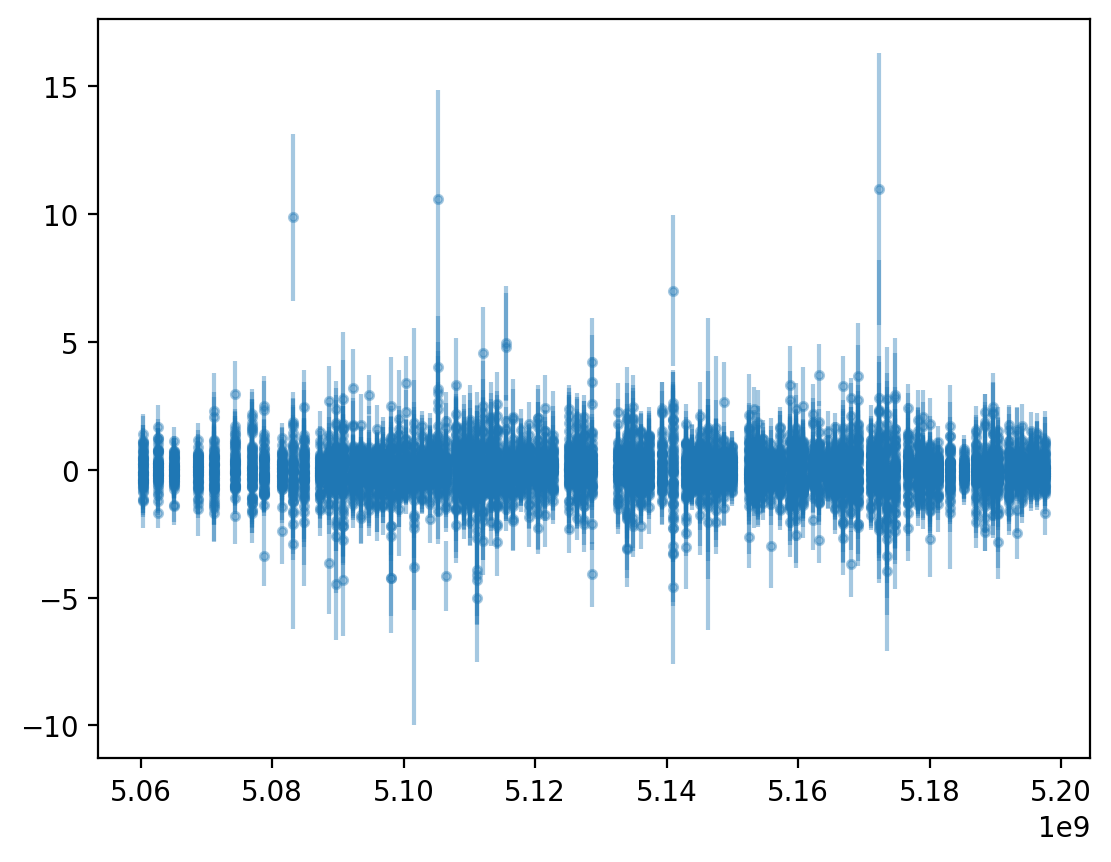

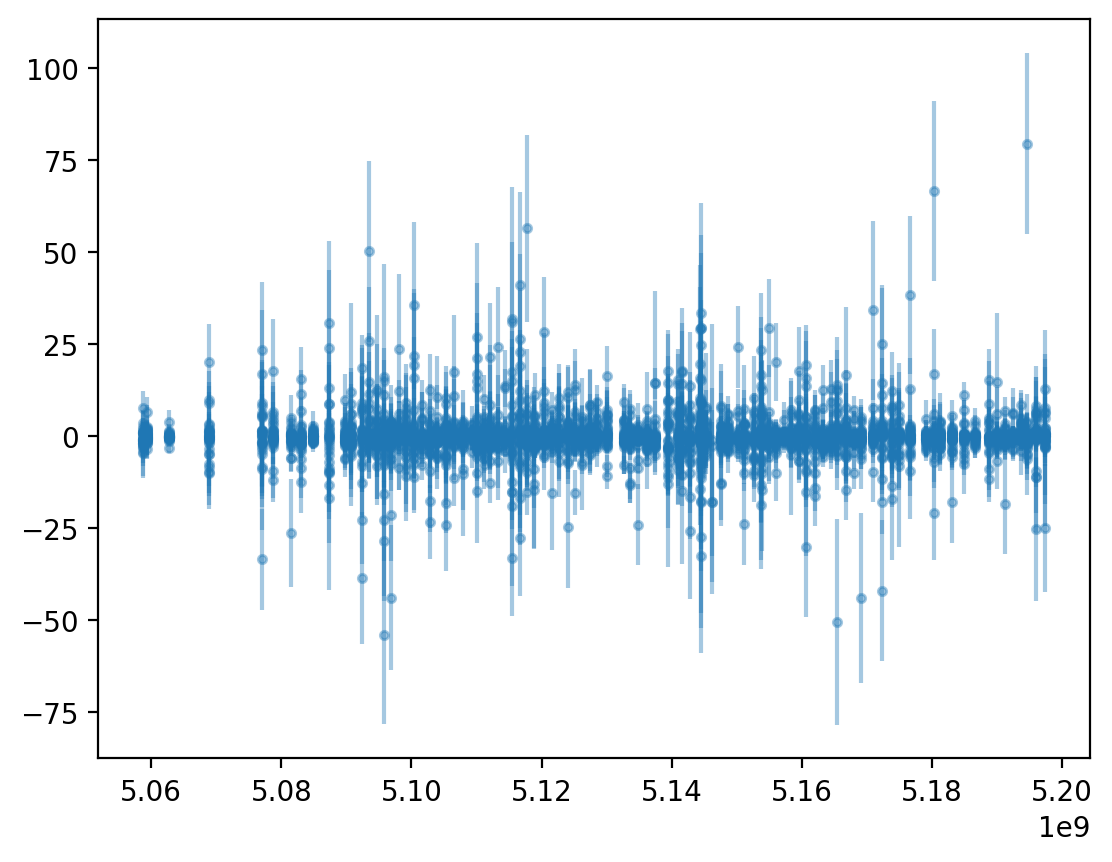

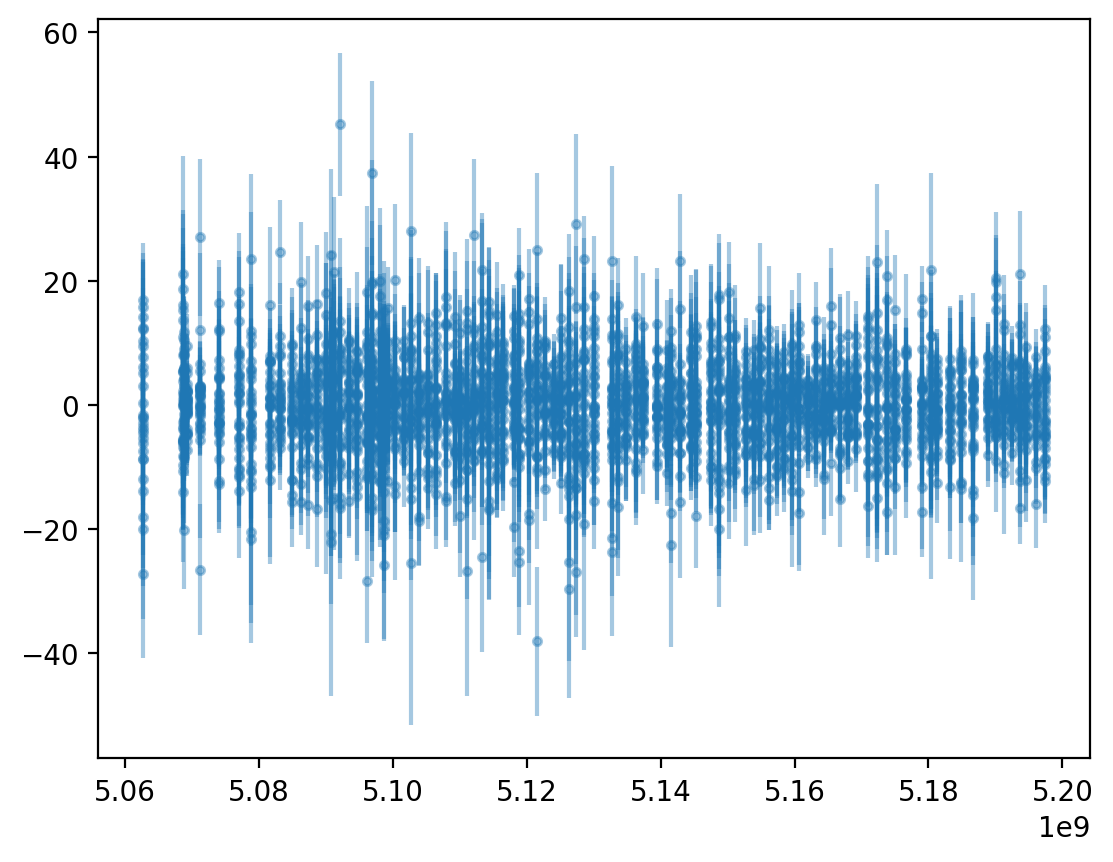

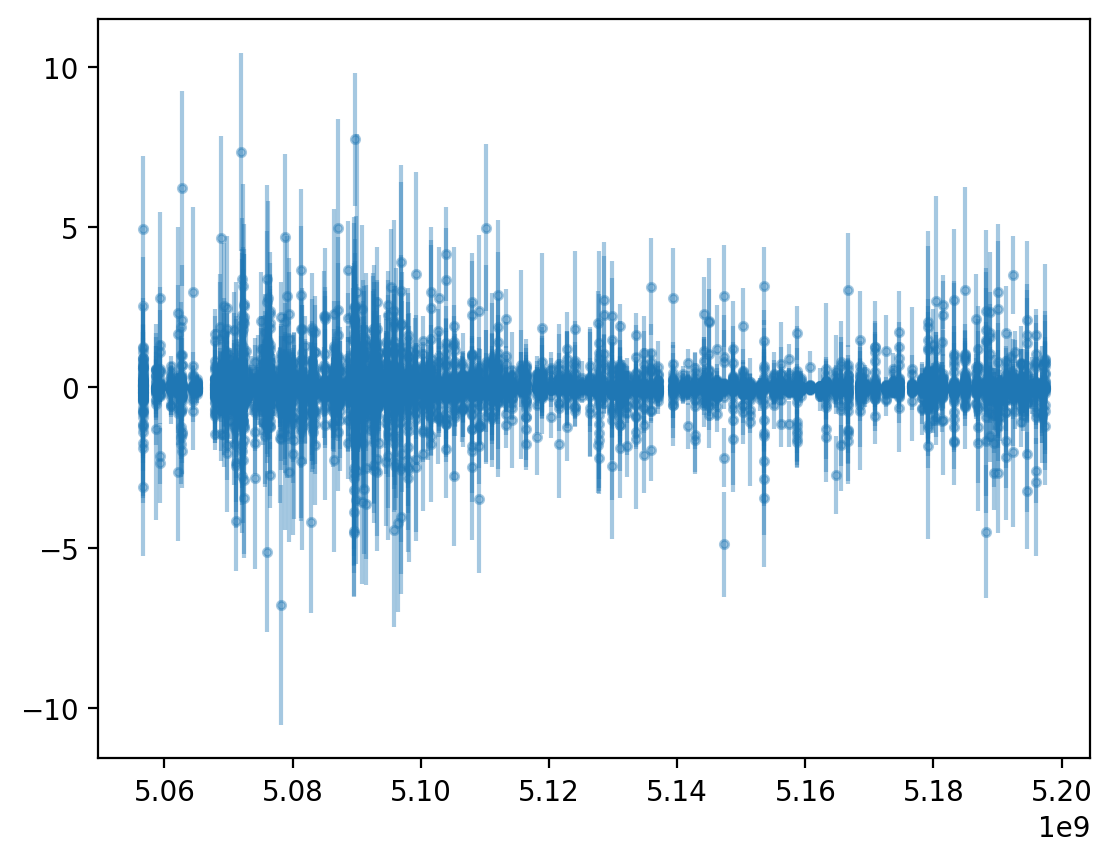

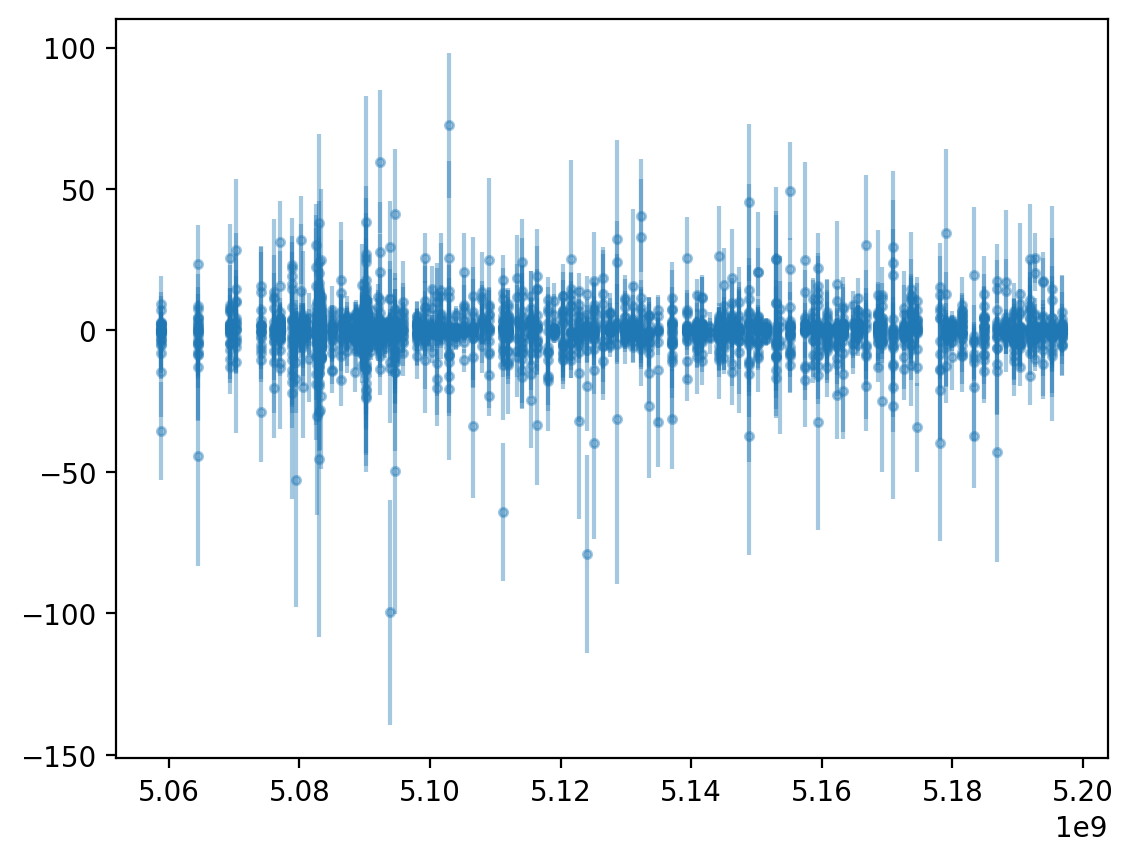

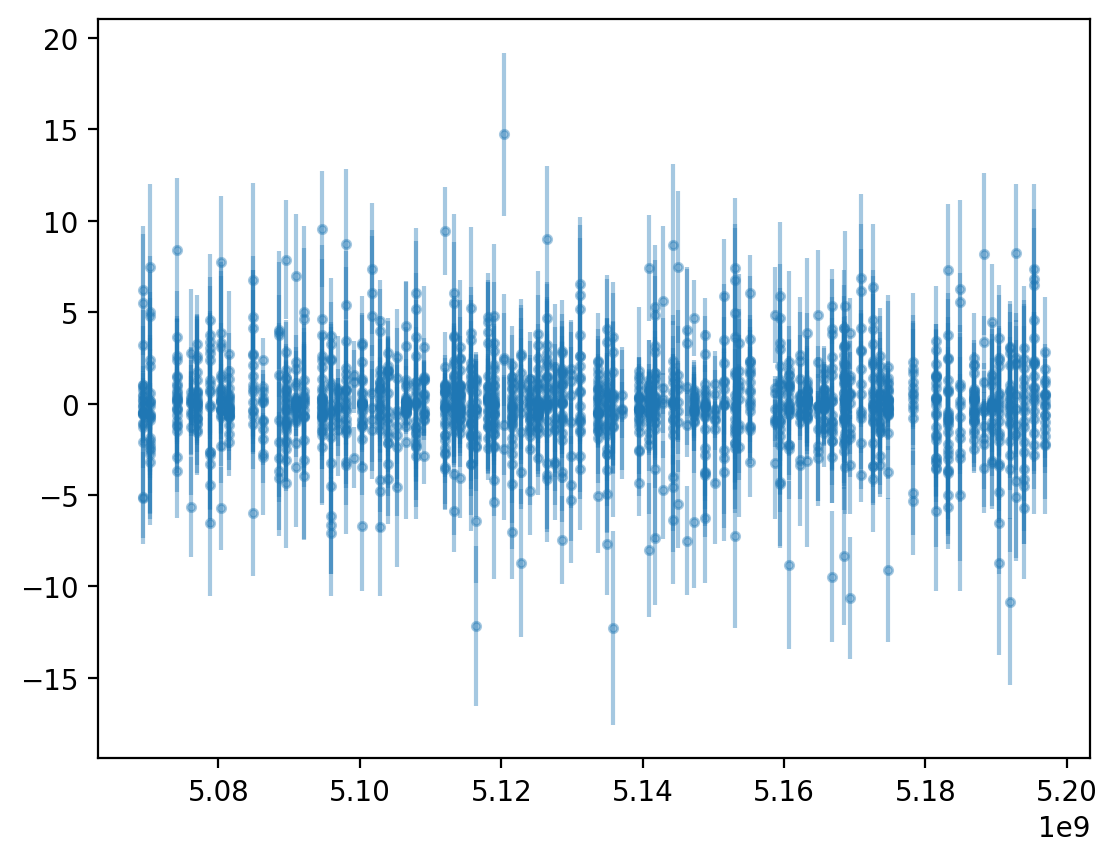

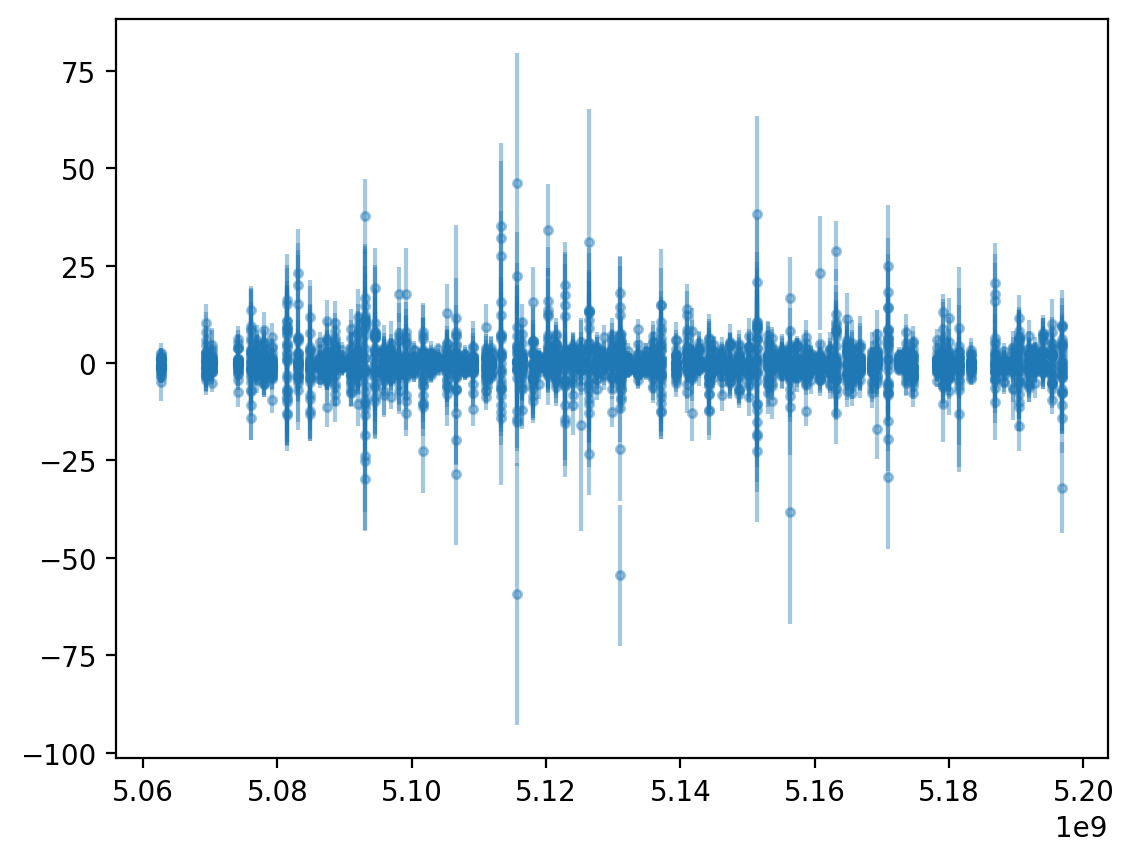

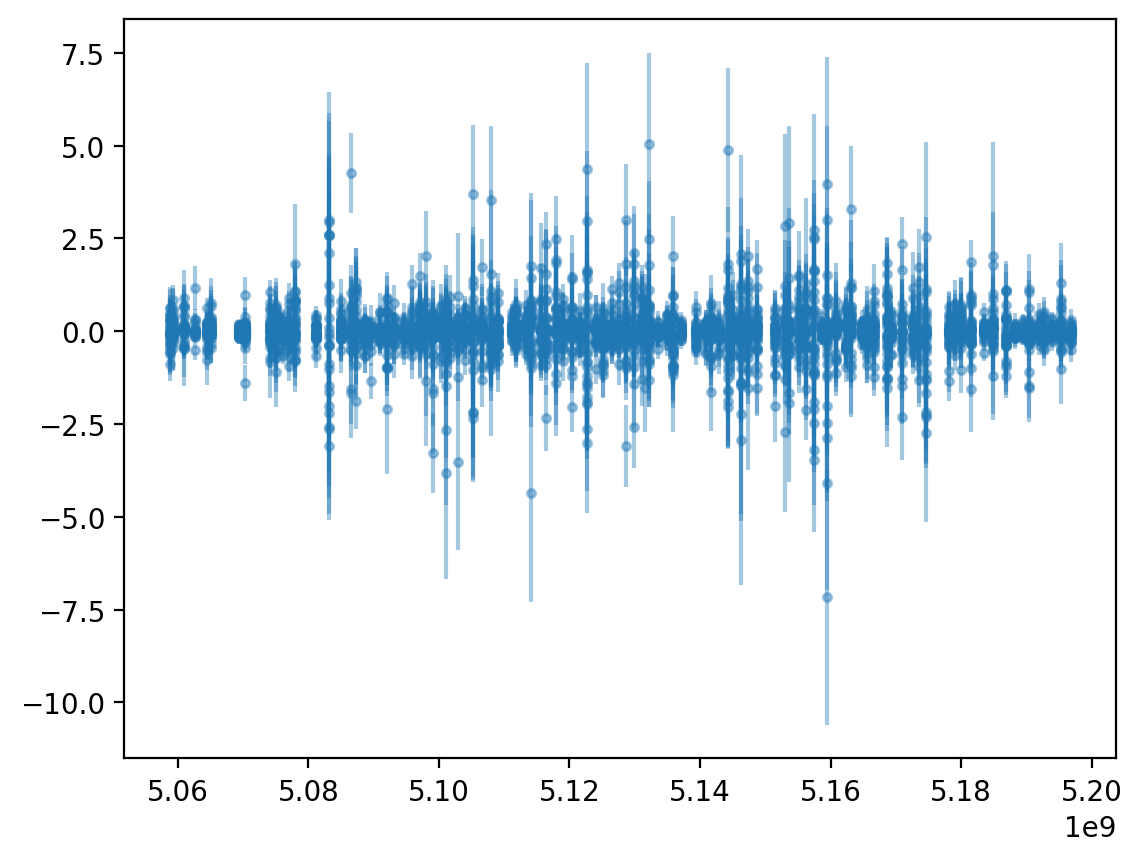

In [7]:
# convert libstempo pulsar objects into enterprise pulsar objects
Epsrs = lt2ent(psrs)
    
# can also plot residuals from enterprise pulsar objects
for i, p in enumerate(Epsrs):
    plt.figure(i)
    plt.errorbar(p.toas, 
                 p.residuals/1e-6, 
                 p.toaerrs/1e-6, 
                 fmt='.', alpha=0.4);
plt.show()

In [8]:
# can save your simulated timfiles if you so desire
# (should be in libstempo format)
# change directory to save to as you wish
import time

def save_sims(psrs, outdir):
    """ Save simulated timing files.
    """
    if not os.path.exists(outdir):
        os.makedirs(outdir)
    for p in psrs:
        p.savepar(outdir + p.name + '_simulated.par')
        p.savetim(outdir + p.name + '_simulated.tim')
        time.sleep(0.5)
save_sims(psrs, outdir='/fred/oz002/users/mmiles/MPTA_GW/enterprise_newdata/out_ptmcmc/HD_reweighting/fake_pta/partim/simmed_data_nothing/')



Results for PSR J0610-2100


RMS pre-fit residual = 0.000 (us), RMS post-fit residual = 2.546 (us)
Fit Chisq = 0	Chisqr/nfree = 0.00/0 = -nan	pre/post = 0
Number of fit parameters: 0
Number of points in fit = 0
Offset: 0 1 offset_e*sqrt(n) = 0 n = 0


PARAMETER       Pre-fit                   Post-fit                  Uncertainty   Difference   Fit
---------------------------------------------------------------------------------------------------
RAJ (rad)       1.61541877761898          1.61541877744237          1.9645e-10    -1.7661e-10   Y
RAJ (hms)       06:10:13.6027449           06:10:13.6027425         2.7014e-06    -2.4286e-06  
DECJ (rad)      -0.366653676242767        -0.366653676168255        2.8808e-10    7.4512e-11    Y
DECJ (dms)      -21:00:27.74949           -21:00:27.74947           5.942e-05     1.5369e-05   
F0 (s^-1)       258.978474859645          258.978474859647          2.5303e-12    1.08e-12      Y
F1 (s^-2)       -8.26737494905964e-16     -8.26675791386802e-



Results for PSR J0614-3329


RMS pre-fit residual = 0.000 (us), RMS post-fit residual = 1.977 (us)
Fit Chisq = 0	Chisqr/nfree = 0.00/0 = -nan	pre/post = 0
Number of fit parameters: 0
Number of points in fit = 0
Offset: 0 1 offset_e*sqrt(n) = 0 n = 0


PARAMETER       Pre-fit                   Post-fit                  Uncertainty   Difference   Fit
---------------------------------------------------------------------------------------------------
RAJ (rad)       1.63263539430756          1.63263539449465          1.8561e-10    1.8709e-10    Y
RAJ (hms)       06:14:10.3482186           06:14:10.3482212         2.5523e-06    2.5726e-06   
DECJ (rad)      -0.584656845557712        -0.584656845428037        2.0789e-10    1.2968e-10    Y
DECJ (dms)      -33:29:54.13097           -33:29:54.13094           4.288e-05     2.6747e-05   
F0 (s^-1)       317.594449777352          317.594449777354          2.0718e-12    1.5916e-12    Y
F1 (s^-2)       -1.75661855521696e-15     -1.7565913760238e-1

In [55]:
dir(psrs[0])

['__class__',
 '__contains__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '_dimensionfy',
 '_fit',
 '_inputobservatory',
 '_inputobsfreq',
 '_inputtoaerrs',
 '_inputtoas',
 '_readfiles',
 '_readflags',
 '_readpars',
 '_set_observation_from_input',
 '_setstring',
 '_timeify',
 'add_phasejump',
 'batCorrs',
 'binarydelay',
 'binarymodel',
 'chisq',
 'clock',
 'deleted',
 'deletedmask',
 'designmatrix',
 'earth_ssb',
 'elevation',
 'ephemeris',
 'errs',
 'excludepars',
 'filename',
 'fit',
 'flags',
 'flagvals',
 'formbats',
 'formresiduals',
 'freqs',
 'jupiter_ssb',
 'mars_ssb',
 'mercury_ssb',
 'name',
 'ndim',
 'neptune_ssb',
 'nobs',
 'noisemodel',
 'nphasejumps',
 'observatory_earth',


In [20]:
p.savepar

AttributeError: 'Tempo2Pulsar' object has no attribute 'savepar'

In [ ]:
#for p in psrs:
#    p.savetim('/fred/oz002/users/mmiles/MPTA_GW/simmed_psrs/' + p.name + '_simulated.tim')